In [1]:
import os
import sys
from optparse import OptionParser

import numpy as np
import scipy as ci 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import matplotlib 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import tables 
import pickle
import warnings
from sklearn.externals import joblib
warnings.filterwarnings('once')

In [2]:
lifetime = 86400*365 # 1 year! 
fig_dir = '/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/1_distribution_plots/plots/datamc-1_1-'

# Low Energy Sample

In [192]:
# with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/corsika_h5/corsika_20778.h5','r') as f:
#     n_file = 20216 
with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/corsika_h5/corsika_combined_nocut_test.h5','r') as f:

    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 15
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450
#     CUT_coincident = f.root.MCPrimary_coincident.cols.value[:]==0
    CUT_goodweight = f.root.Weight_GaisserH3a.cols.value[:] > 0
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_goodweight #& CUT_coincident
    
    chi2_corsika = f.root.Collection.cols.chi2[:][CUT]
    chi2_red_corsika = f.root.Collection.cols.chi2_red[:][CUT]
    chi2_new_corsika = f.root.Collection.cols.chi2_new[:][CUT]
    chi2_red_new_corsika = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_corsika = f.root.Collection.cols.PeakOverMedian[:][CUT]
    PeakOverMean_corsika = f.root.Collection.cols.PeakOverMean[:][CUT]
    stoch_corsika = (chi2_red_corsika + (np.log10(PeakOverMedian_corsika)/2))/np.sqrt(2)
    stoch_new_corsika = (np.log10(chi2_red_new_corsika)/2 + (np.log10(PeakOverMedian_corsika)))/np.sqrt(2)

#     loss_0_corsika = f.root.Collection.cols.EnergyLoss_0[:][CUT]
#     loss_1_corsika = f.root.Collection.cols.EnergyLoss_1[:][CUT]
#     loss_2_corsika = f.root.Collection.cols.EnergyLoss_2[:][CUT]
#     loss_3_corsika = f.root.Collection.cols.EnergyLoss_3[:][CUT]
#     loss_4_corsika = f.root.Collection.cols.EnergyLoss_4[:][CUT]
#     loss_5_corsika = f.root.Collection.cols.EnergyLoss_5[:][CUT]
#     loss_6_corsika = f.root.Collection.cols.EnergyLoss_6[:][CUT]
#     loss_7_corsika = f.root.Collection.cols.EnergyLoss_7[:][CUT]
#     loss_8_corsika = f.root.Collection.cols.EnergyLoss_8[:][CUT]
#     loss_9_corsika = f.root.Collection.cols.EnergyLoss_9[:][CUT]
#     loss_10_corsika = f.root.Collection.cols.EnergyLoss_10[:][CUT]
#     loss_11_corsika = f.root.Collection.cols.EnergyLoss_11[:][CUT]
#     loss_12_corsika = f.root.Collection.cols.EnergyLoss_12[:][CUT]
#     loss_13_corsika = f.root.Collection.cols.EnergyLoss_13[:][CUT]
#     loss_14_corsika = f.root.Collection.cols.EnergyLoss_14[:][CUT]
    
    zenith_corsika = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_corsika = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_corsika = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_corsika = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_corsika = f.root.QTot.cols.value[:][CUT]
    Qtot_corsika = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_corsika = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_corsika = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_corsika = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_corsika = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_corsika = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_corsika = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_corsika = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_corsika = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    
    closest_d_corsika = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_corsika = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_corsika = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_corsika = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincident_corsika = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_corsika = f.root.MCPrimary_new.cols.energy[:][CUT]
    
    E_bundle_corsika = f.root.Bundle.cols.MuonBundleEnergy_Ei[:][CUT]
    E_leading_muon_corsika = f.root.Bundle.cols.MostEnergeticMuonEnergy_i[:][CUT]
    singleness_corsika = f.root.Bundle.cols.Singleness_Ei[:][CUT]
    bsize_corsika = f.root.Bundle.cols.Size_Ei[:][CUT]
    xf_corsika = E_bundle_corsika/prim_e_corsika
    E_shower_corsika = prim_e_corsika - E_bundle_corsika # surface shower
    
    runid_corsika = f.root.FileNumber.cols.value[:][CUT]
    eventid_corsika = f.root.FileNumber.cols.Event[:][CUT]
    
#     weight_corsika = f.root.Weight_GaisserH3a.cols.value[:][CUT] * lifetime/n_file # * 903098/363528
    weight_corsika = f.root.Combined_Weight_H3a[:][CUT] * lifetime # * 903098/363528


/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [193]:
len(weight_corsika[weight_corsika>0])/len(weight_corsika)

1.0

In [194]:
with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/data_h5/data_burn_nocut.h5','r') as f:
    nfile_data = [2831731.134,3081951.304,3158084.037,3155703.188,3082765.564]

    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:] < 15
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:] < 450

    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC
    
    chi2_data_burn = f.root.Collection.cols.chi2[:][CUT]
    chi2_red_data_burn = f.root.Collection.cols.chi2_red[:][CUT]
    chi2_new_data_burn = f.root.Collection.cols.chi2_new[:][CUT]
    chi2_red_new_data_burn = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_data_burn = f.root.Collection.cols.PeakOverMedian[:][CUT]
    PeakOverMean_data_burn = f.root.Collection.cols.PeakOverMean[:][CUT]
    stoch_data_burn = (chi2_red_data_burn + (np.log10(PeakOverMedian_data_burn)/2))/np.sqrt(2)
    stoch_new_data_burn = np.log10(chi2_red_new_data_burn)/8 + np.log10(PeakOverMedian_data_burn)
    
#     loss_0_data_burn = f.root.Collection.cols.EnergyLoss_0[:][CUT]
#     loss_1_data_burn = f.root.Collection.cols.EnergyLoss_1[:][CUT]
#     loss_2_data_burn = f.root.Collection.cols.EnergyLoss_2[:][CUT]
#     loss_3_data_burn = f.root.Collection.cols.EnergyLoss_3[:][CUT]
#     loss_4_data_burn = f.root.Collection.cols.EnergyLoss_4[:][CUT]
#     loss_5_data_burn = f.root.Collection.cols.EnergyLoss_5[:][CUT]
#     loss_6_data_burn = f.root.Collection.cols.EnergyLoss_6[:][CUT]
#     loss_7_data_burn = f.root.Collection.cols.EnergyLoss_7[:][CUT]
#     loss_8_data_burn = f.root.Collection.cols.EnergyLoss_8[:][CUT]
#     loss_9_data_burn = f.root.Collection.cols.EnergyLoss_9[:][CUT]
#     loss_10_data_burn = f.root.Collection.cols.EnergyLoss_10[:][CUT]
#     loss_11_data_burn = f.root.Collection.cols.EnergyLoss_11[:][CUT]
#     loss_12_data_burn = f.root.Collection.cols.EnergyLoss_12[:][CUT]
#     loss_13_data_burn = f.root.Collection.cols.EnergyLoss_13[:][CUT]
#     loss_14_data_burn = f.root.Collection.cols.EnergyLoss_14[:][CUT]
    
    zenith_data_burn = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_data_burn = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_data_burn = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_data_burn = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_data_burn = f.root.QTot.cols.value[:][CUT]
    Qtot_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_data_burn = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_data_burn = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_data_burn = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_data_burn = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_data_burn = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_data_burn = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_data_burn = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_data_burn = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    

    closest_d_data_burn = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_data_burn = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_data_burn = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_data_burn = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]

    IT_Npulse_data_burn = f.root.IT_veto_double.cols.num_Total_hits[:][CUT]
    Npulse_in_window_data_burn = f.root.IT_veto_double.cols.num_correlated_Total_hits_in_window[:][CUT]
    Npulse_off_window_data_burn = f.root.IT_veto_double.cols.num_correlated_Total_hits_off_window[:][CUT]

    passed_2_data_burn = (f.root.IT_veto_double.cols.flag_window_2[:][CUT]).astype(bool) # 1 if passed 
    vetoed_2_data_burn = (1 - f.root.IT_veto_double.cols.flag_window_2[:][CUT]).astype(bool) 

    runid_data_burn = f.root.I3EventHeader.cols.Run[:][CUT]
    eventid_data_burn = f.root.I3EventHeader.cols.Event[:][CUT]


In [195]:
weight_data_burn = lifetime/np.sum(nfile_data) * np.ones(len(zenith_data_burn))

# weight_data_burn = np.sum(weight_corsika) * np.ones(len(zenith_data_burn))/len(zenith_data_burn)
# 

In [196]:
print('total CORSIKA:',np.sum(weight_corsika))
print('total burn:',np.sum(weight_data_burn))

total CORSIKA: 13970166.038070673
total burn: 12104057.950016946


In [197]:
plt.rcParams.update({'font.size': 14})
plt.rc('axes', axisbelow=True)

In [198]:
def sumw2(h,b,weight,quantity):
    w_2 = []
    for i in range(0,len(b)-1):
        all_weight_in_bin = weight[(b[i]<quantity)&(quantity<b[i+1])]
        w_2.append(np.sum(all_weight_in_bin**2))
    return w_2

In [199]:
def datamc(varmc,vardata,varname,bins):
    plt.figure(figsize=(7,7))

    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], wspace=0.0, hspace=0.1)
    ax1 = plt.subplot(gs[0])

    h,b,p = plt.hist(varmc,bins=bins,weights=weight_corsika,histtype='step',log=True,lw=2,label='CORSIKA',bottom=10**(-6),color='dodgerblue')
    hh,bb = np.histogram(vardata,bins=bins,weights=weight_data_burn)
    plt.plot((bb[1:]+bb[:-1])/2,hh,'.',ms=8,alpha=1,label='data burn',color='black')
    
    plt.ylabel('Events in 365 days')
    plt.xlim(np.min(bins),np.max(bins))
    plt.ylim(10**(-1),)
    plt.legend(prop={'size': 11})
    plt.title('data/MC comparison')
    plt.grid(True,which='both',zorder=0,alpha=0.3)
#     ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
#     ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax1.tick_params(labelbottom=False)    

    err_w = np.sqrt(sumw2(h,b,weight_corsika,varmc))
    err_ww = np.sqrt(sumw2(hh,bb,weight_data_burn,vardata))

    ax2 = plt.subplot(gs[1])
    
    bb = (bb[1:]+bb[:-1])/2 # shift bins
    cut_nozero = (hh>0)&(h>0)
    bb = bb[cut_nozero]
    err_w = err_w[cut_nozero]
    err_ww = err_ww[cut_nozero]
    h = h[cut_nozero]
    hh = hh[cut_nozero]
    
    yerr = np.sqrt((err_ww/h)**2 + (hh/h**2)**2 * err_w**2)
    plt.errorbar(bb, hh/h, yerr = yerr, fmt='o',ms=3,color='black',label='burn')
    plt.axhline(1,ls='--',lw=1,color='black')

    plt.xlabel(varname)
    plt.ylabel('Data/MC')
    plt.xlim(np.min(bins),np.max(bins))
    plt.ylim(0,2)
    plt.grid(True,which='both',zorder=0,alpha=0.3)
#     ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
#     ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

### stochasticity

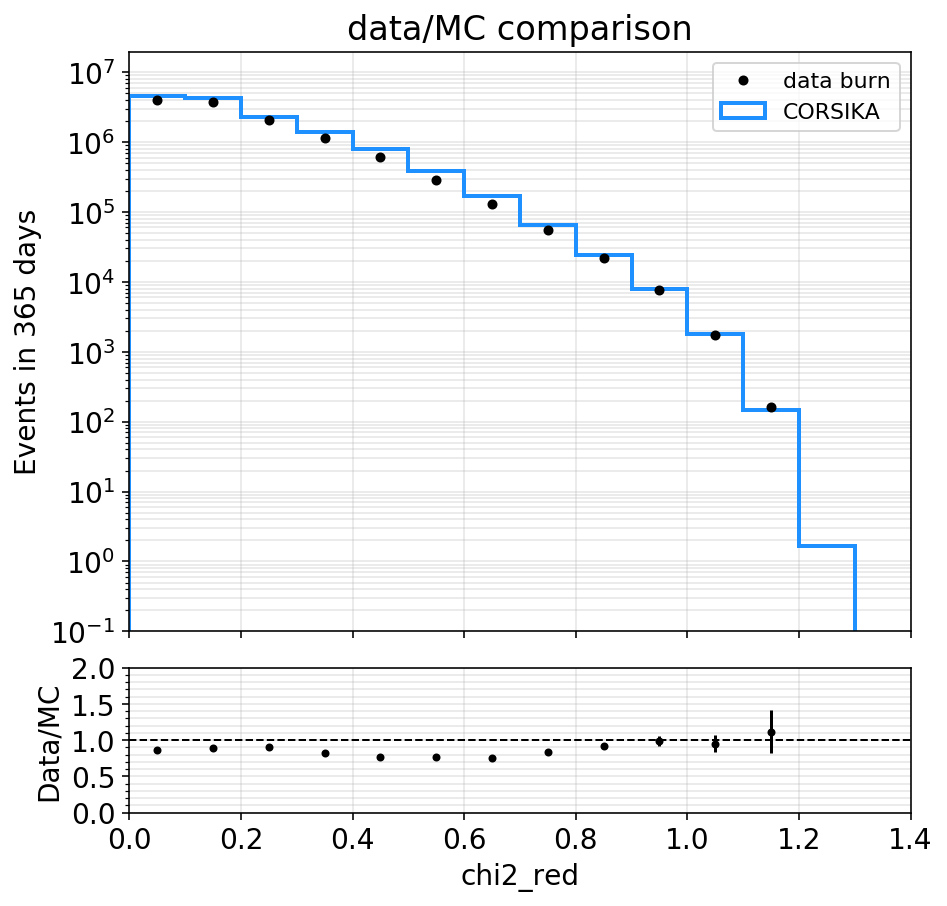

In [200]:
datamc(chi2_red_corsika,chi2_red_data_burn,'chi2_red',np.arange(0,1.5,0.1))

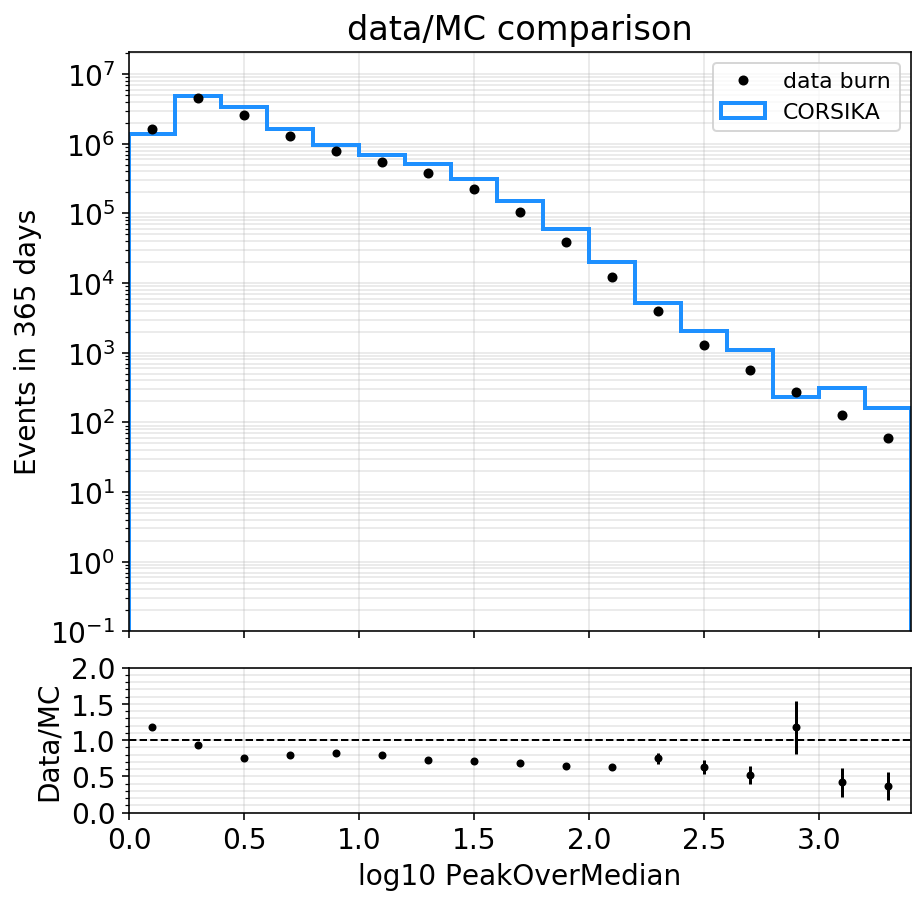

In [201]:
datamc(np.log10(PeakOverMedian_corsika),np.log10(PeakOverMedian_data_burn),'log10 PeakOverMedian',np.arange(0,3.5,0.2))

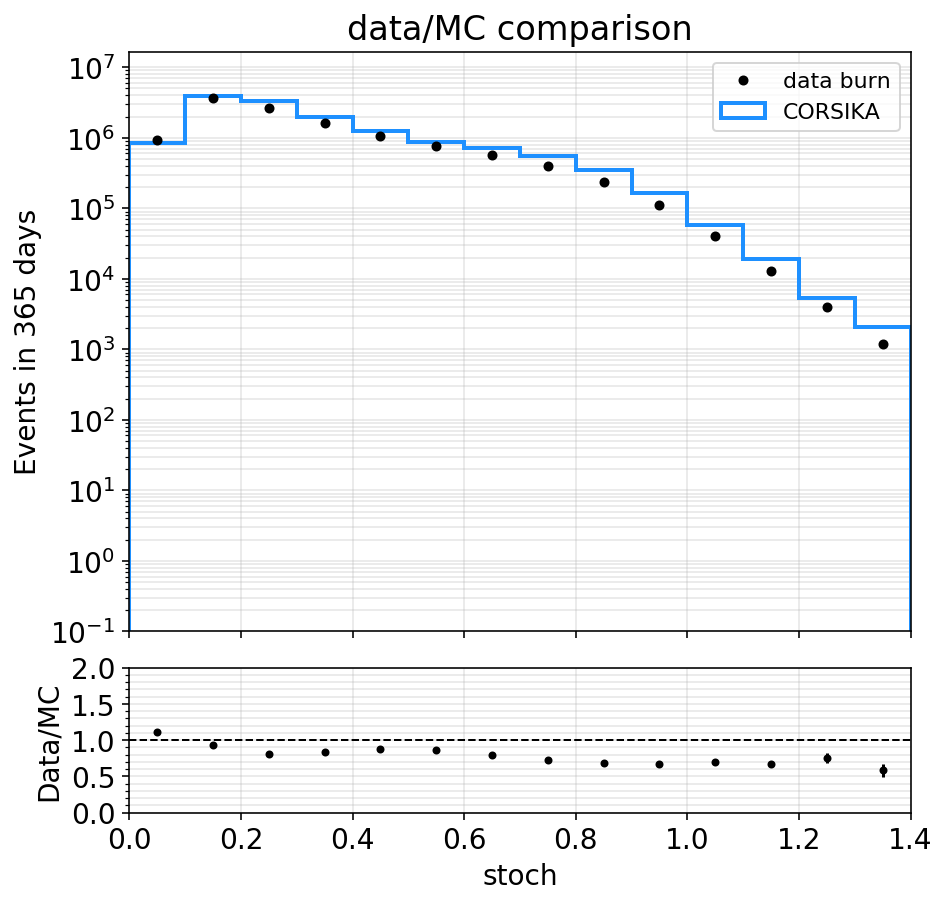

In [202]:
datamc(stoch_corsika,stoch_data_burn,'stoch',np.arange(0,1.5,0.1))

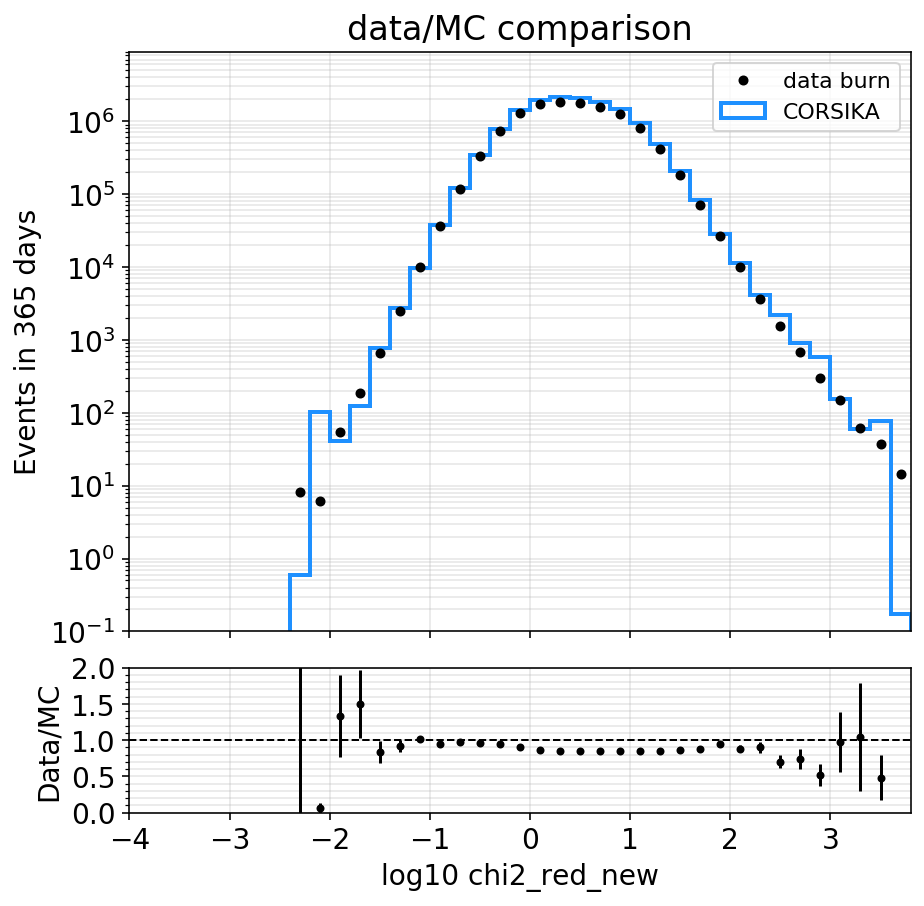

In [203]:
datamc(np.log10(chi2_red_new_corsika),np.log10(chi2_red_new_data_burn),'log10 chi2_red_new',np.arange(-4,4,0.2))

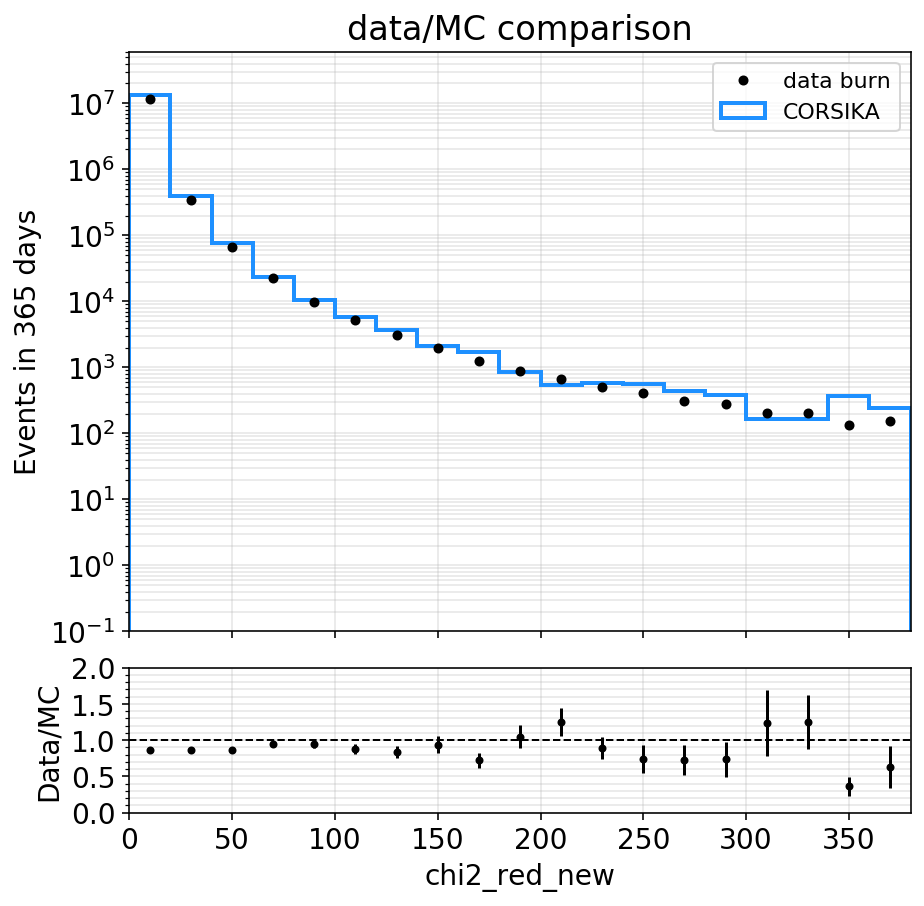

In [204]:
datamc(chi2_red_new_corsika,chi2_red_new_data_burn,'chi2_red_new',np.arange(0,400,20))

### energy variables 

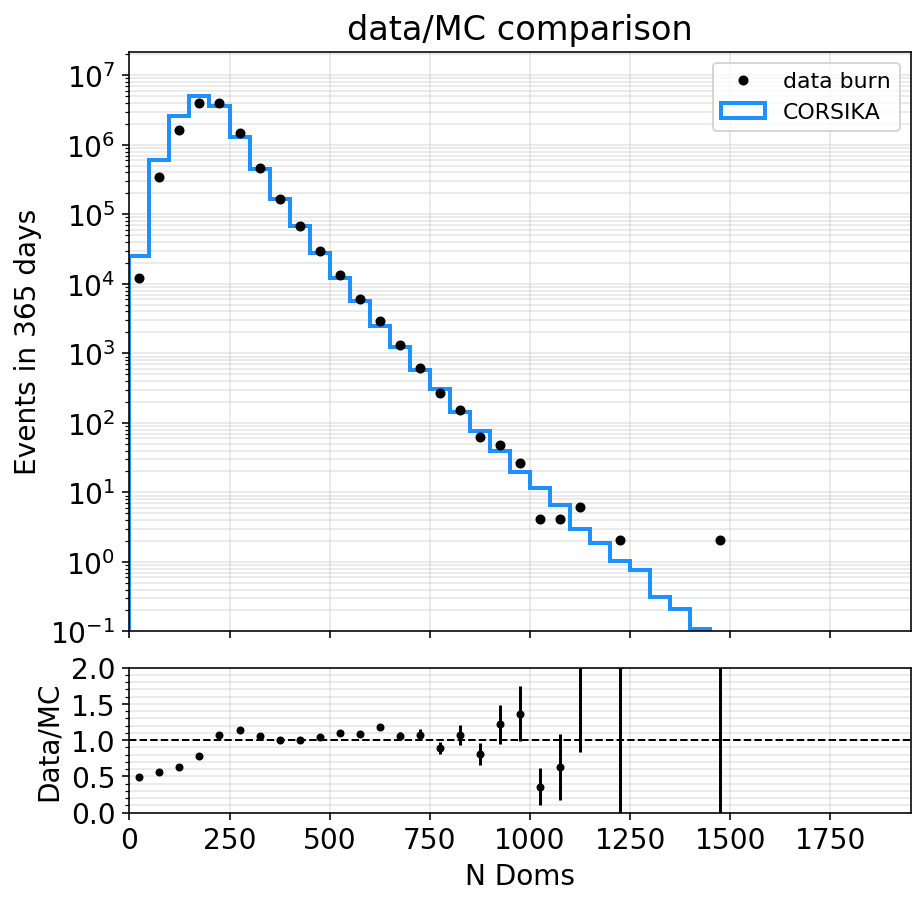

In [205]:
datamc(N_dom_corsika,N_dom_data_burn,'N Doms',np.arange(0,2000,50))

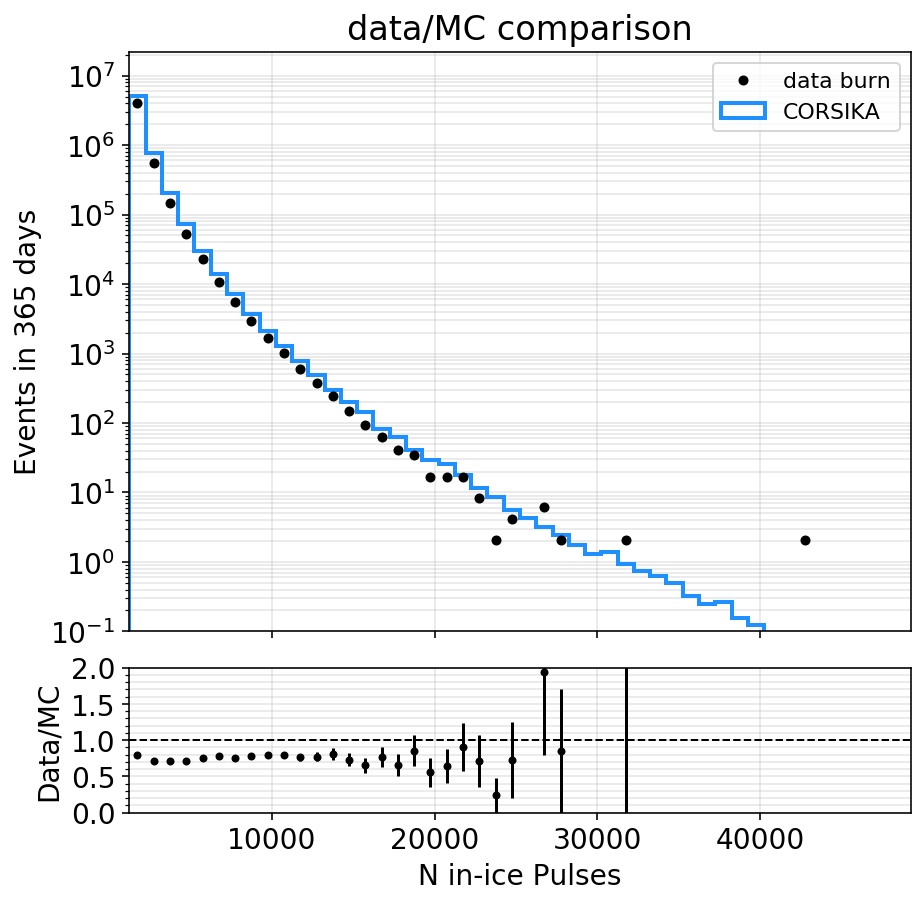

In [206]:
datamc(N_pulses_corsika,N_pulses_data_burn,'N in-ice Pulses',np.arange(1250,50000,1000))

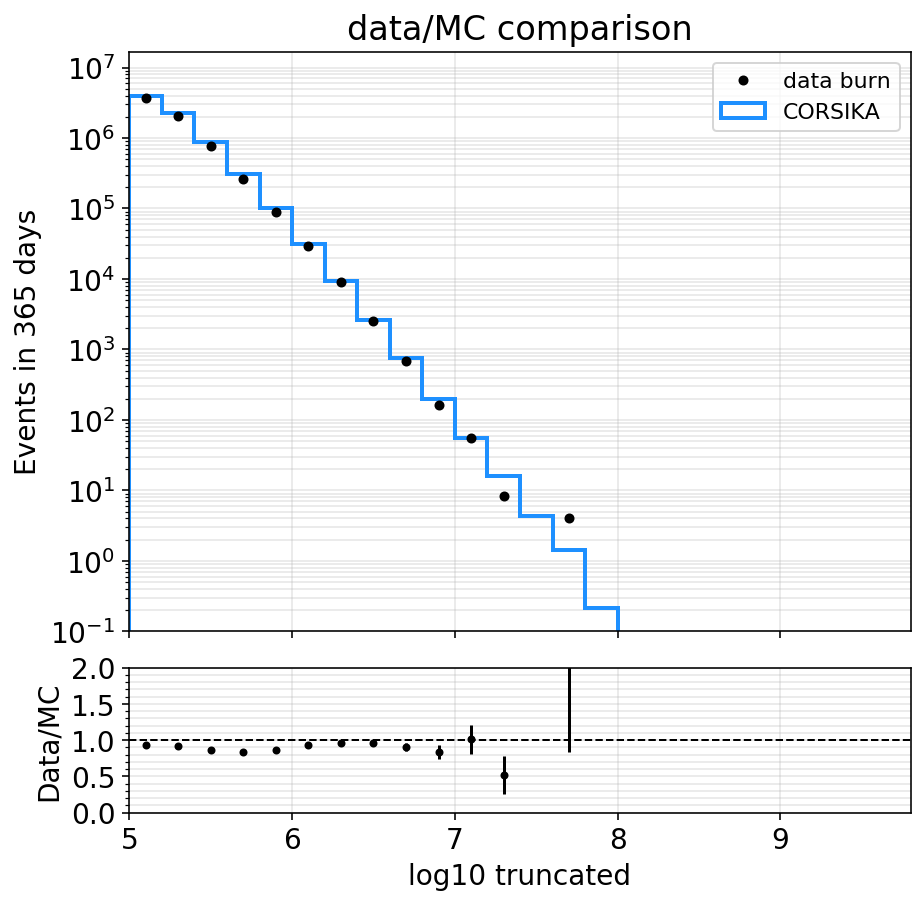

In [207]:
datamc(np.log10(truncated_muon_e_corsika),np.log10(truncated_muon_e_data_burn),'log10 truncated',np.arange(5,10,0.2))

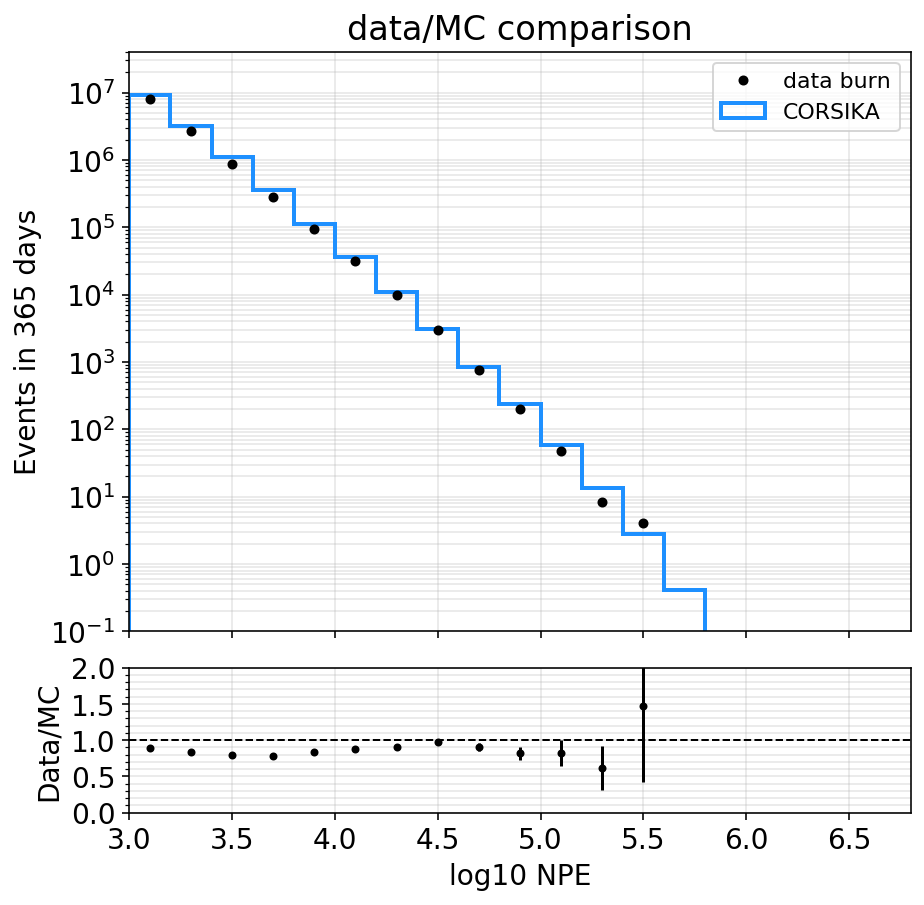

In [208]:
datamc(np.log10(NPE_corsika),np.log10(NPE_data_burn),'log10 NPE',np.arange(3,7,0.2))

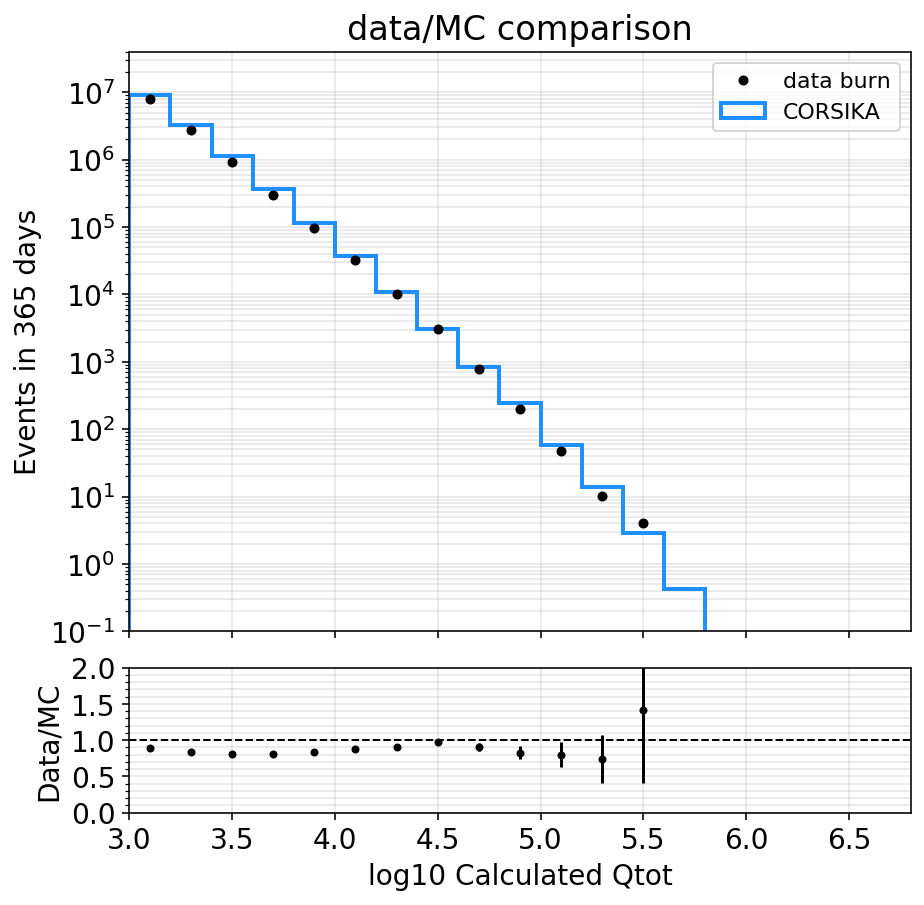

In [209]:
datamc(np.log10(Qtot_corsika),np.log10(Qtot_data_burn),'log10 Calculated Qtot',np.arange(3,7,0.2))

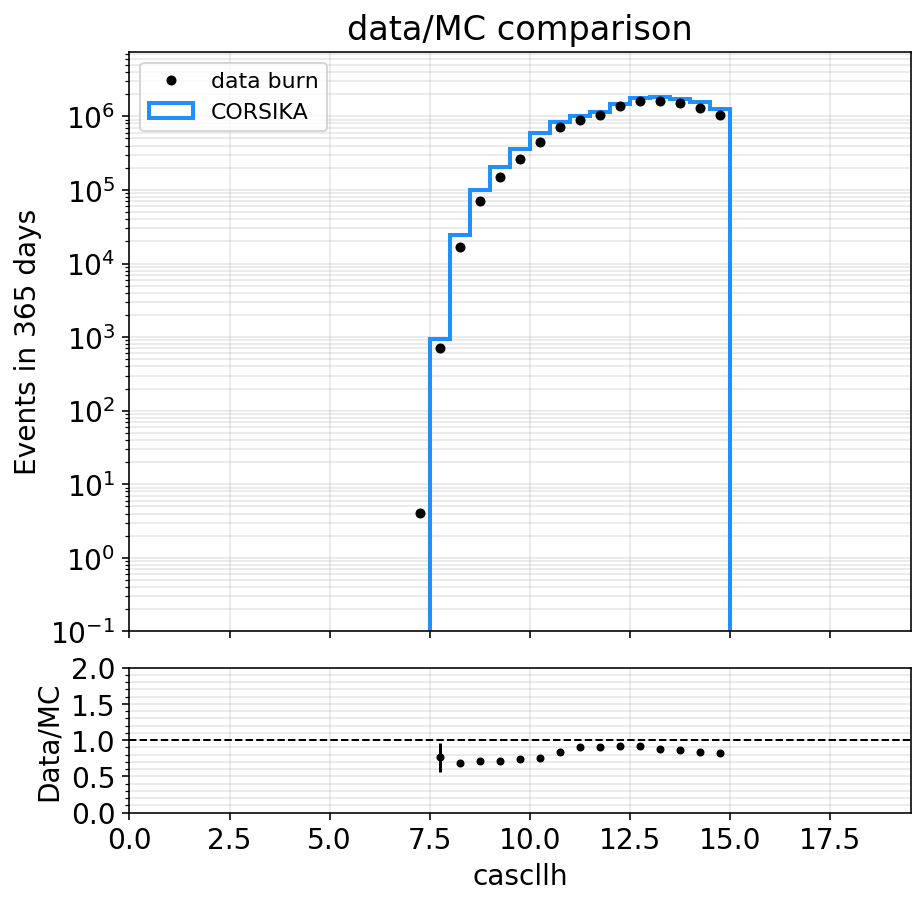

In [210]:
datamc(cascllh_corsika,cascllh_data_burn,'cascllh',np.arange(0,20,0.5))

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


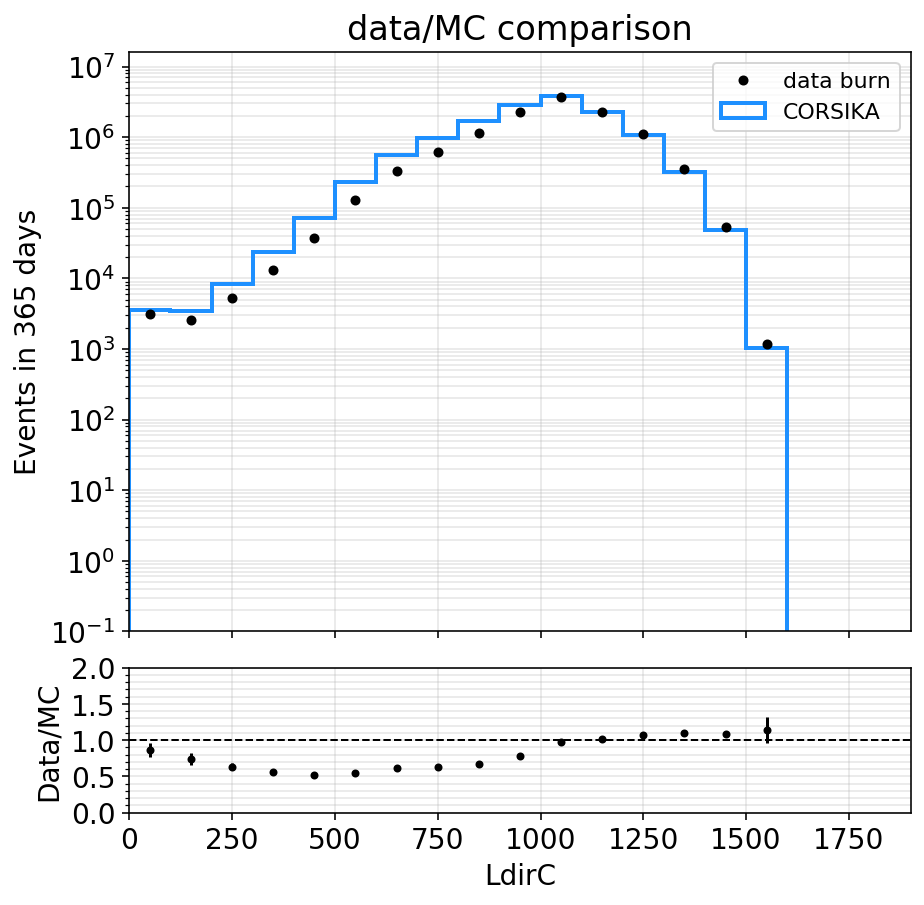

In [211]:
datamc(Ldir_corsika,Ldir_data_burn,'LdirC',np.arange(0,2000,100))

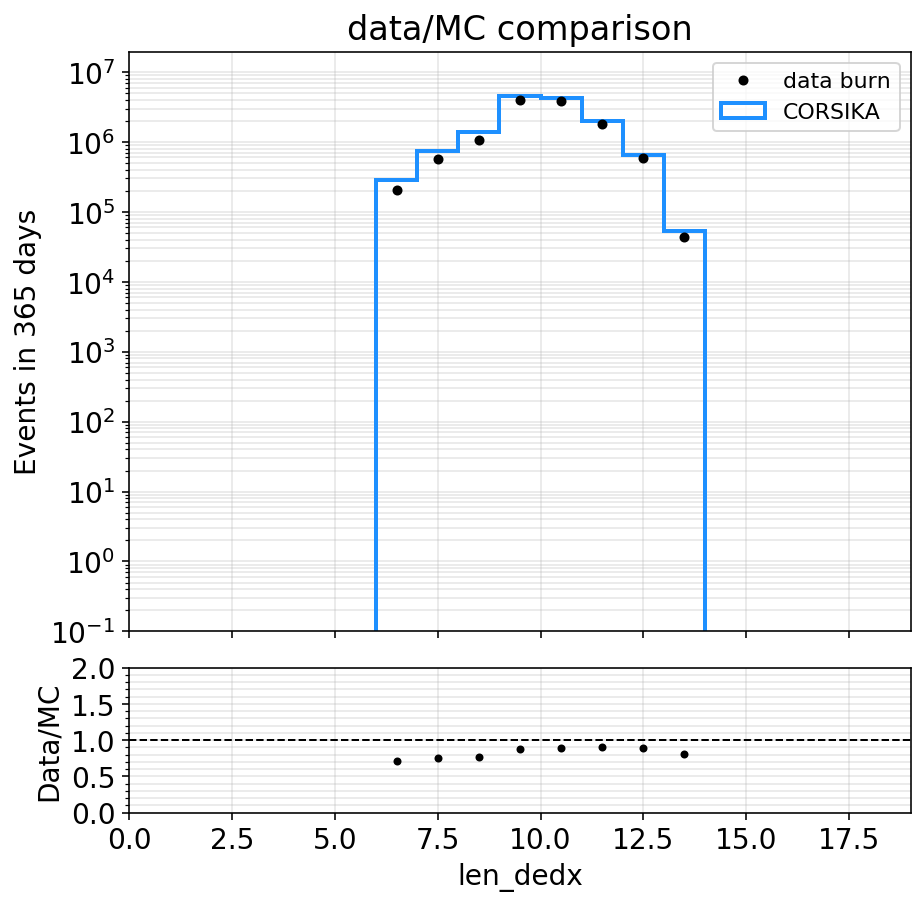

In [212]:
datamc(len_dedx_corsika,len_dedx_data_burn,'len_dedx',np.arange(0,20,1))

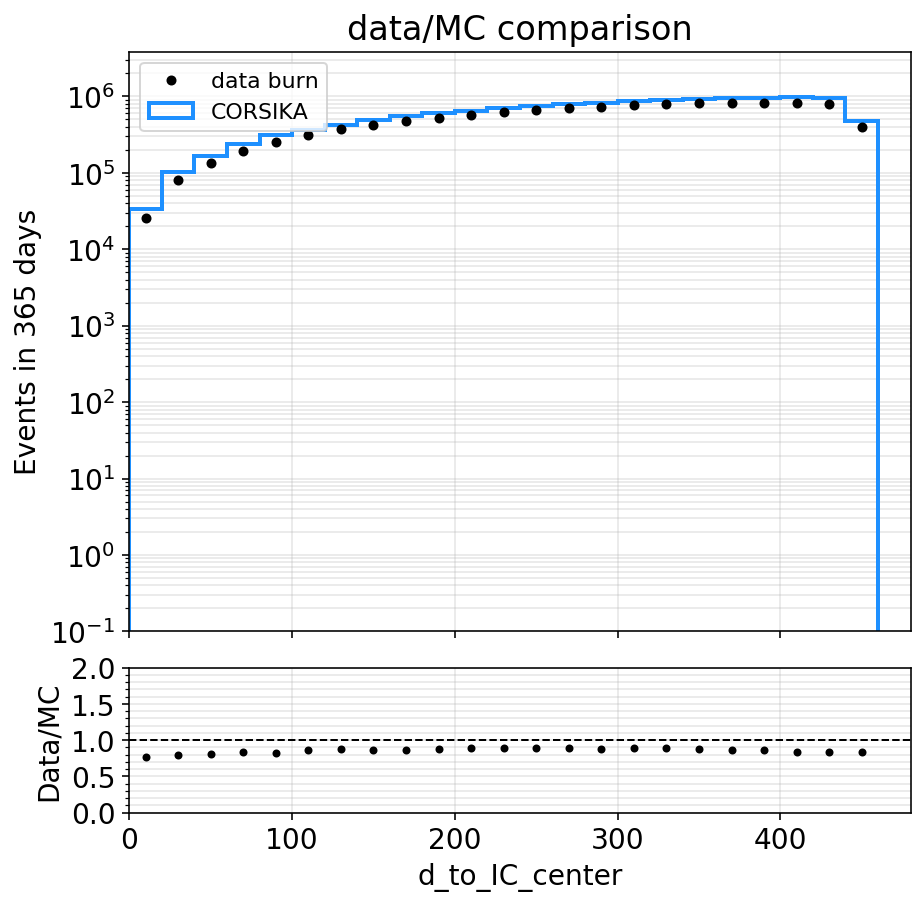

In [213]:
datamc(d_to_IC_center_corsika,d_to_IC_center_data_burn,'d_to_IC_center',np.arange(0,500,20))

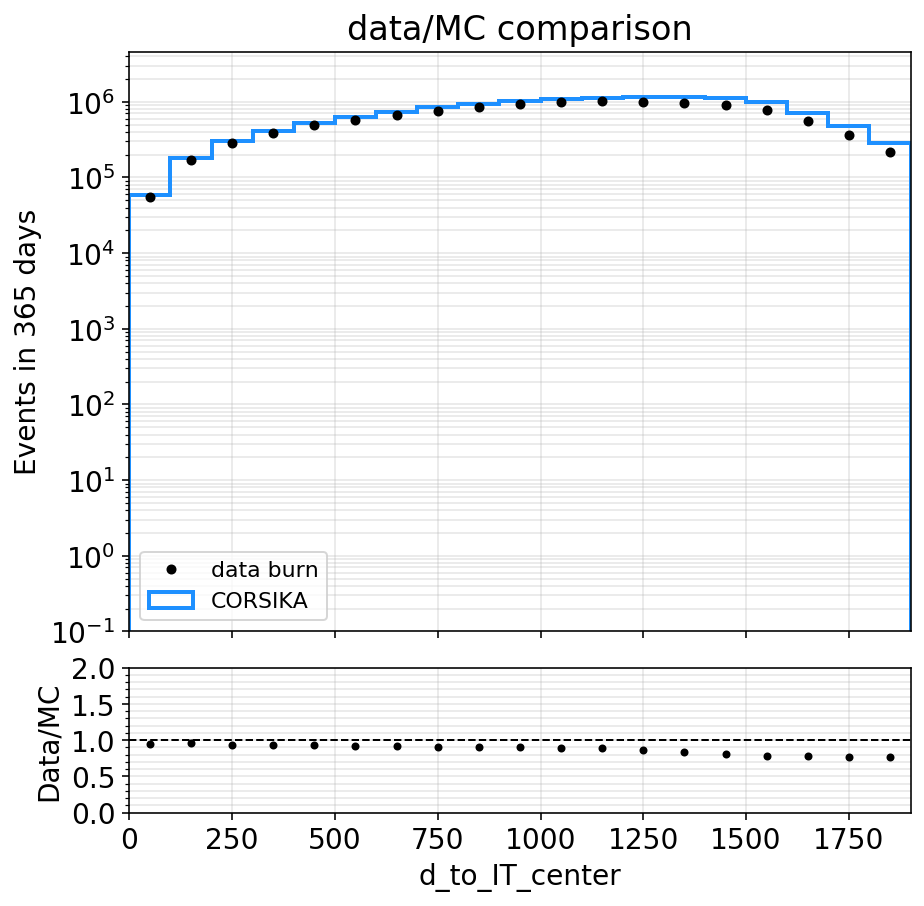

In [214]:
datamc(d_to_IT_center_corsika,d_to_IT_center_data_burn,'d_to_IT_center',np.arange(0,2000,100))

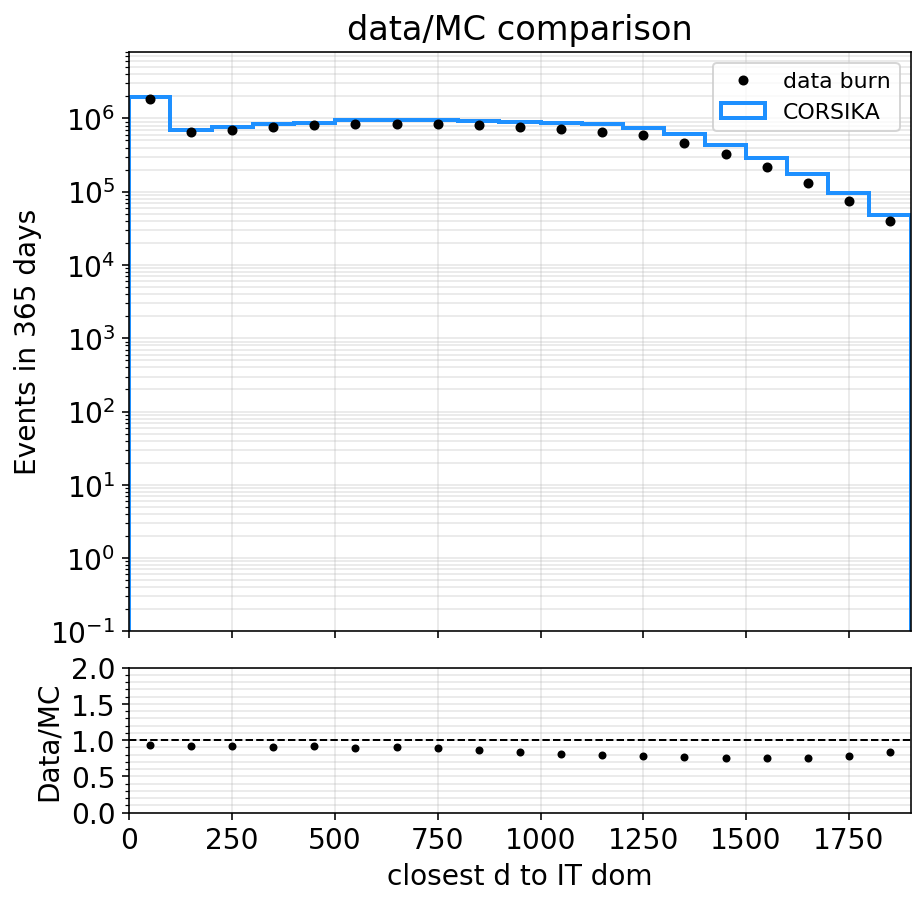

In [215]:
datamc(closest_d_corsika,closest_d_data_burn,'closest d to IT dom',np.arange(0,2000,100))

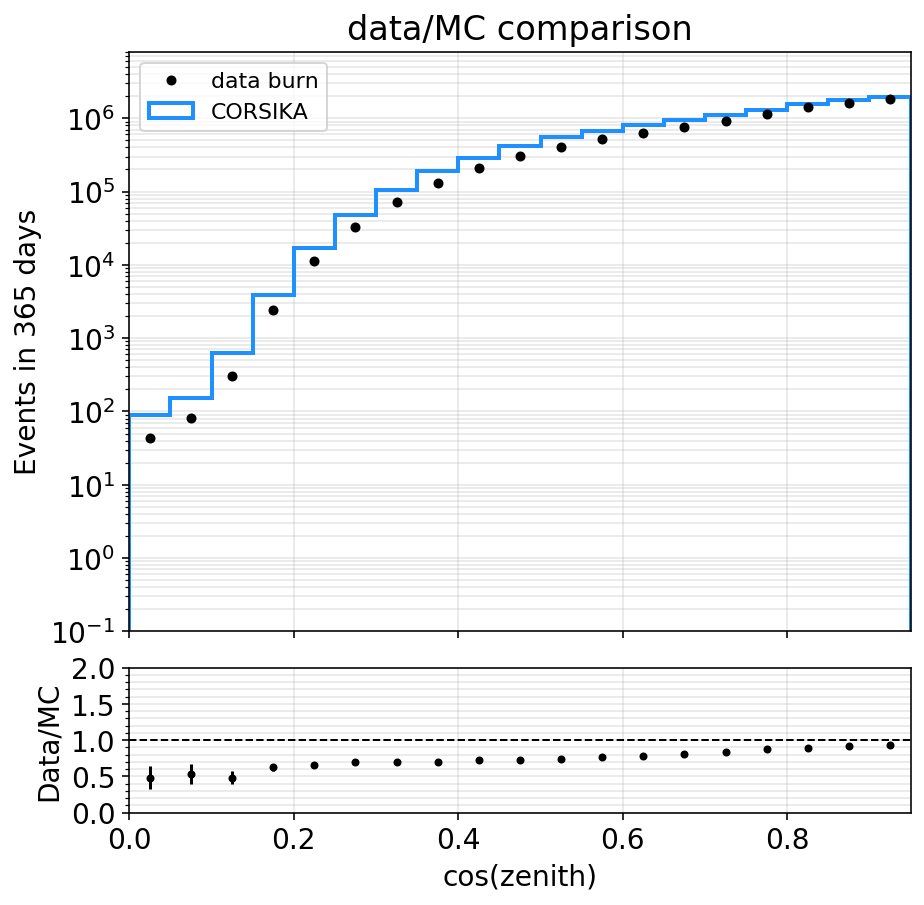

In [216]:
datamc(np.cos(zenith_corsika),np.cos(zenith_data_burn),'cos(zenith)',np.arange(0,1,0.05))

# High Energy Sample

In [8]:
# presel cut 
with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/corsika_h5/corsika_combined_nocut_test.h5','r') as f:

    # WARNING: applied weight>0 cut here
    CUT = (f.root.QTot.cols.value[:]>4000) & (f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]>300000) & (f.root.Weight_GaisserH3a.cols.value[:]>0)
    
    chi2_corsika_ = f.root.Collection.cols.chi2[:][CUT]
    chi2_red_corsika_ = f.root.Collection.cols.chi2_red[:][CUT]
    chi2_new_corsika_ = f.root.Collection.cols.chi2_new[:][CUT]
    chi2_red_new_corsika_ = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_corsika_ = f.root.Collection.cols.PeakOverMedian[:][CUT]
    PeakOverMean_corsika_ = f.root.Collection.cols.PeakOverMean[:][CUT]
    stoch_corsika_ = (chi2_red_corsika_ + (np.log10(PeakOverMedian_corsika_)/2))/np.sqrt(2)
    stoch_new_corsika_ = (np.log10(chi2_red_new_corsika_)/2 + (np.log10(PeakOverMedian_corsika_)))/np.sqrt(2)

#     loss_0_corsika_ = f.root.Collection.cols.EnergyLoss_0[:][CUT]
#     loss_1_corsika_ = f.root.Collection.cols.EnergyLoss_1[:][CUT]
#     loss_2_corsika_ = f.root.Collection.cols.EnergyLoss_2[:][CUT]
#     loss_3_corsika_ = f.root.Collection.cols.EnergyLoss_3[:][CUT]
#     loss_4_corsika_ = f.root.Collection.cols.EnergyLoss_4[:][CUT]
#     loss_5_corsika_ = f.root.Collection.cols.EnergyLoss_5[:][CUT]
#     loss_6_corsika_ = f.root.Collection.cols.EnergyLoss_6[:][CUT]
#     loss_7_corsika_ = f.root.Collection.cols.EnergyLoss_7[:][CUT]
#     loss_8_corsika_ = f.root.Collection.cols.EnergyLoss_8[:][CUT]
#     loss_9_corsika_ = f.root.Collection.cols.EnergyLoss_9[:][CUT]
#     loss_10_corsika_ = f.root.Collection.cols.EnergyLoss_10[:][CUT]
#     loss_11_corsika_ = f.root.Collection.cols.EnergyLoss_11[:][CUT]
#     loss_12_corsika_ = f.root.Collection.cols.EnergyLoss_12[:][CUT]
#     loss_13_corsika_ = f.root.Collection.cols.EnergyLoss_13[:][CUT]
#     loss_14_corsika_ = f.root.Collection.cols.EnergyLoss_14[:][CUT]
    
    zenith_corsika_ = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_corsika_ = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_corsika_ = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_corsika_ = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_corsika_ = f.root.QTot.cols.value[:][CUT]
    Qtot_corsika_ = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_corsika_ = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_corsika_ = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_corsika_ = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_corsika_ = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_corsika_ = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_corsika_ = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_corsika_ = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_corsika_ = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    
    closest_d_corsika_ = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_corsika_ = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_corsika_ = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_corsika_ = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    coincident_corsika_ = f.root.MCPrimary_coincident.cols.value[:][CUT]
    prim_e_corsika_ = f.root.MCPrimary_new.cols.energy[:][CUT]
    topocount_corsika_ = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    wimpcount_corsika_ = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]

    E_bundle_corsika_ = f.root.Bundle.cols.MuonBundleEnergy_Ei[:][CUT]
    E_leading_muon_corsika_ = f.root.Bundle.cols.MostEnergeticMuonEnergy_i[:][CUT]
    singleness_corsika_ = f.root.Bundle.cols.Singleness_Ei[:][CUT]
    bsize_corsika_ = f.root.Bundle.cols.Size_Ei[:][CUT]
    xf_corsika_ = E_bundle_corsika_/prim_e_corsika_
    E_shower_corsika_ = prim_e_corsika_ - E_bundle_corsika_ # surface shower
    
    runid_corsika_ = f.root.FileNumber.cols.value[:][CUT]
    eventid_corsika_ = f.root.FileNumber.cols.Event[:][CUT]
    
    A_corsika_ = f.root.MCPrimary_new.cols.type[:][CUT]

    weight_corsika_ = f.root.Combined_Weight_H3a[:][CUT] * lifetime # * 903098/363528
    

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [9]:
with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/data_h5/data_burn_nocut.h5','r') as f:
    nfile_data = [2831731.134,3081951.304,3158084.037,3155703.188,3082765.564]

    CUT = (f.root.QTot.cols.value[:]>4000) & (f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:]>300000)
    
    chi2_data_burn_ = f.root.Collection.cols.chi2[:][CUT]
    chi2_red_data_burn_ = f.root.Collection.cols.chi2_red[:][CUT]
    chi2_new_data_burn_ = f.root.Collection.cols.chi2_new[:][CUT]
    chi2_red_new_data_burn_ = f.root.Collection.cols.chi2_red_new[:][CUT]
    PeakOverMedian_data_burn_ = f.root.Collection.cols.PeakOverMedian[:][CUT]
    PeakOverMean_data_burn_ = f.root.Collection.cols.PeakOverMean[:][CUT]
    stoch_data_burn_ = (chi2_red_data_burn_ + (np.log10(PeakOverMedian_data_burn_)/2))/np.sqrt(2)
    stoch_new_data_burn_ = np.log10(chi2_red_new_data_burn_)/8 + np.log10(PeakOverMedian_data_burn_)
    
#     loss_0_data_burn_ = f.root.Collection.cols.EnergyLoss_0[:][CUT]
#     loss_1_data_burn_ = f.root.Collection.cols.EnergyLoss_1[:][CUT]
#     loss_2_data_burn_ = f.root.Collection.cols.EnergyLoss_2[:][CUT]
#     loss_3_data_burn_ = f.root.Collection.cols.EnergyLoss_3[:][CUT]
#     loss_4_data_burn_ = f.root.Collection.cols.EnergyLoss_4[:][CUT]
#     loss_5_data_burn_ = f.root.Collection.cols.EnergyLoss_5[:][CUT]
#     loss_6_data_burn_ = f.root.Collection.cols.EnergyLoss_6[:][CUT]
#     loss_7_data_burn_ = f.root.Collection.cols.EnergyLoss_7[:][CUT]
#     loss_8_data_burn_ = f.root.Collection.cols.EnergyLoss_8[:][CUT]
#     loss_9_data_burn_ = f.root.Collection.cols.EnergyLoss_9[:][CUT]
#     loss_10_data_burn_ = f.root.Collection.cols.EnergyLoss_10[:][CUT]
#     loss_11_data_burn_ = f.root.Collection.cols.EnergyLoss_11[:][CUT]
#     loss_12_data_burn_ = f.root.Collection.cols.EnergyLoss_12[:][CUT]
#     loss_13_data_burn_ = f.root.Collection.cols.EnergyLoss_13[:][CUT]
#     loss_14_data_burn_ = f.root.Collection.cols.EnergyLoss_14[:][CUT]
    
    zenith_data_burn_ = f.root.SplineMPE.cols.zenith[:][CUT]
    truncated_muon_e_data_burn_ = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:][CUT]
    len_dedx_data_burn_ = f.root.Collection.cols.len_dEdxVector[:][CUT]
    cascllh_data_burn_ = f.root.CascadeLlhVertexFitParams.cols.rlogL[:][CUT]
    NPE_data_burn_ = f.root.QTot.cols.value[:][CUT]
    Qtot_data_burn_ = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    N_dom_data_burn_ = f.root.Balloon.cols.N_Doms[:][CUT]
    N_pulses_data_burn_ = f.root.Balloon.cols.N_Pulses[:][CUT]
    balloon_data_burn_ = f.root.Balloon.cols.InIceBalloonParameter[:][CUT]
    balloon_adjusted_data_burn_ = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:][CUT]
    in_ice_total_charge_data_burn_ = f.root.Balloon.cols.InIceTotalCharge[:][CUT]
    in_ice_total_charge_reduced_data_burn_ = f.root.Balloon.cols.InIceTotalCharge_reduced[:][CUT]
    ndirdoms_data_burn_ = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:][CUT]
    ndirpulses_data_burn_ = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:][CUT]
    
    closest_d_data_burn_ = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:][CUT]
    d_to_IC_center_data_burn_ = f.root.Dist_to_IC_center.cols.value[:][CUT]
    d_to_IT_center_data_burn_ = f.root.Dist_to_IT_center.cols.value[:][CUT]
    Ldir_data_burn_ = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:][CUT]
    topocount_data_burn_ = f.root.TologicalCounterSplitCount.cols.value[:][CUT]
    wimpcount_data_burn_ = f.root.WIMPrecoTopoSplitSplitCount.cols.value[:][CUT]

    IT_Npulse_data_burn_ = f.root.IT_veto_double.cols.num_Total_hits[:][CUT]
    Npulse_in_window_data_burn_ = f.root.IT_veto_double.cols.num_correlated_Total_hits_in_window[:][CUT]
    Npulse_off_window_data_burn_ = f.root.IT_veto_double.cols.num_correlated_Total_hits_off_window[:][CUT]

    passed_2_data_burn_ = (f.root.IT_veto_double.cols.flag_window_2[:][CUT]).astype(bool) # 1 if passed 
    vetoed_2_data_burn_ = (1 - f.root.IT_veto_double.cols.flag_window_2[:][CUT]).astype(bool) 

    runid_data_burn_ = f.root.I3EventHeader.cols.Run[:][CUT]
    eventid_data_burn_ = f.root.I3EventHeader.cols.Event[:][CUT]

    weight_data_burn_ = lifetime/np.sum(nfile_data) * np.ones(len(zenith_data_burn_))
    # if normalize data to have same total N events as corsika:
#     weight_data_burn_ = np.sum(weight_corsika) * np.ones(len(zenith_data_burn_))/len(zenith_data_burn_)
    

In [10]:
# ----- secondary cut ----- #

In [11]:
CUT_dedx = len_dedx_corsika_ >= 6
CUT_cascllh = cascllh_corsika_ < 16
CUT_d_IC = d_to_IC_center_corsika_ < 450
# CUT_balloon = balloon_corsika_ < 0.25
# CUT_Ldir = Ldir_corsika_ > 600
# CUT_ndom = N_dom_corsika_ > 250

CUT = CUT_dedx & CUT_cascllh & CUT_d_IC# & CUT_balloon & CUT_Ldir & CUT_ndom 

chi2_corsika = chi2_corsika_[CUT]
chi2_red_corsika = chi2_red_corsika_[CUT]
chi2_new_corsika = chi2_new_corsika_[CUT]
chi2_red_new_corsika = chi2_red_new_corsika_[CUT]
PeakOverMedian_corsika = PeakOverMedian_corsika_[CUT]
stoch_corsika = (chi2_red_corsika + (np.log10(PeakOverMedian_corsika)/2))/np.sqrt(2)
stoch_new_corsika = (np.log10(chi2_red_new_corsika)/2 + (np.log10(PeakOverMedian_corsika)))/np.sqrt(2)

balloon_corsika = balloon_corsika_[CUT]
balloon_adjusted_corsika = balloon_adjusted_corsika_[CUT]

# loss_0_corsika = loss_0_corsika_[CUT]
# loss_1_corsika = loss_1_corsika_[CUT]
# loss_2_corsika = loss_2_corsika_[CUT]
# loss_3_corsika = loss_3_corsika_[CUT]
# loss_4_corsika = loss_4_corsika_[CUT]
# loss_5_corsika = loss_5_corsika_[CUT]
# loss_6_corsika = loss_6_corsika_[CUT]
# loss_7_corsika = loss_7_corsika_[CUT]
# loss_8_corsika = loss_8_corsika_[CUT]
# loss_9_corsika = loss_9_corsika_[CUT]
# loss_10_corsika = loss_10_corsika_[CUT]
# loss_11_corsika = loss_11_corsika_[CUT]
# loss_12_corsika = loss_12_corsika_[CUT]
# loss_13_corsika = loss_13_corsika_[CUT]
# loss_14_corsika = loss_14_corsika_[CUT]

zenith_corsika = zenith_corsika_[CUT]
truncated_muon_e_corsika = truncated_muon_e_corsika_[CUT]
len_dedx_corsika = len_dedx_corsika_[CUT]
cascllh_corsika = cascllh_corsika_[CUT]
NPE_corsika = NPE_corsika_[CUT]
Qtot_corsika = Qtot_corsika_[CUT]
N_dom_corsika = N_dom_corsika_[CUT]
N_pulses_corsika = N_pulses_corsika_[CUT]
balloon_corsika = balloon_corsika_[CUT]
balloon_adjusted_corsika = balloon_adjusted_corsika_[CUT]
in_ice_total_charge_corsika = in_ice_total_charge_corsika_[CUT]
in_ice_total_charge_reduced_corsika = in_ice_total_charge_reduced_corsika_[CUT]
ndirdoms_corsika = ndirdoms_corsika_[CUT]
ndirpulses_corsika = ndirpulses_corsika_[CUT]
    
closest_d_corsika = closest_d_corsika_[CUT]
d_to_IC_center_corsika = d_to_IC_center_corsika_[CUT]
d_to_IT_center_corsika = d_to_IT_center_corsika_[CUT]
Ldir_corsika = Ldir_corsika_[CUT]

coincident_corsika = coincident_corsika_[CUT]
prim_e_corsika = prim_e_corsika_[CUT]
topocount_corsika = topocount_corsika_[CUT]
wimpcount_corsika = wimpcount_corsika_[CUT]

E_bundle_corsika = E_bundle_corsika_[CUT]
E_leading_muon_corsika = E_leading_muon_corsika_[CUT]
singleness_corsika = singleness_corsika_[CUT]
bsize_corsika = bsize_corsika_[CUT]
xf_corsika = E_bundle_corsika/prim_e_corsika
E_shower_corsika = prim_e_corsika - E_bundle_corsika # surface shower

A_corsika = A_corsika_[CUT]

CUT_H = A_corsika == 2212
CUT_He = A_corsika == 1000020040
CUT_N= A_corsika == 1000070140
CUT_Al = A_corsika == 1000130270
CUT_Fe = A_corsika == 1000260560

runid_corsika = runid_corsika_[CUT]
eventid_corsika = eventid_corsika_[CUT]

weight_corsika = weight_corsika_[CUT] # * 903098/363528
weight_corsika_H = np.sum(weight_corsika) * weight_corsika[CUT_H]/np.sum(weight_corsika[CUT_H])
weight_corsika_He = np.sum(weight_corsika) * weight_corsika[CUT_He]/np.sum(weight_corsika[CUT_He])
weight_corsika_N = np.sum(weight_corsika) * weight_corsika[CUT_N]/np.sum(weight_corsika[CUT_N])
weight_corsika_Al = np.sum(weight_corsika) * weight_corsika[CUT_Al]/np.sum(weight_corsika[CUT_Al])
weight_corsika_Fe = np.sum(weight_corsika) * weight_corsika[CUT_Fe]/np.sum(weight_corsika[CUT_Fe])


In [12]:
print(len(weight_corsika[prim_e_corsika<1e6]))

186


In [13]:
nfile_data = [2831731.134,3081951.304,3110722.657,3155703.188,3082765.564]

CUT_dedx = len_dedx_data_burn_ >= 6
CUT_cascllh = cascllh_data_burn_ < 16
CUT_d_IC = d_to_IC_center_data_burn_ < 450
# CUT_balloon = balloon_data_burn_ < 0.25
# CUT_Ldir = Ldir_data_burn_ > 600
# CUT_ndom = N_dom_data_burn_ > 250

CUT = CUT_dedx & CUT_cascllh & CUT_d_IC #& CUT_balloon & CUT_Ldir & CUT_ndom 

chi2_data_burn = chi2_data_burn_[CUT]
chi2_red_data_burn = chi2_red_data_burn_[CUT]
chi2_new_data_burn = chi2_new_data_burn_[CUT]
chi2_red_new_data_burn = chi2_red_new_data_burn_[CUT]
PeakOverMedian_data_burn = PeakOverMedian_data_burn_[CUT]
stoch_data_burn = (chi2_red_data_burn + (np.log10(PeakOverMedian_data_burn)/2))/np.sqrt(2)
stoch_new_data_burn = (np.log10(chi2_red_new_data_burn)/2 + (np.log10(PeakOverMedian_data_burn)))/np.sqrt(2)

balloon_data_burn = balloon_data_burn_[CUT]
balloon_adjusted_data_burn = balloon_adjusted_data_burn_[CUT]

# loss_0_data_burn = loss_0_data_burn[CUT]
# loss_1_data_burn = loss_1_data_burn[CUT]
# loss_2_data_burn = loss_2_data_burn[CUT]
# loss_3_data_burn = loss_3_data_burn[CUT]
# loss_4_data_burn = loss_4_data_burn[CUT]
# loss_5_data_burn = loss_5_data_burn[CUT]
# loss_6_data_burn = loss_6_data_burn[CUT]
# loss_7_data_burn = loss_7_data_burn[CUT]
# loss_8_data_burn = loss_8_data_burn[CUT]
# loss_9_data_burn = loss_9_data_burn[CUT]
# loss_10_data_burn = loss_10_data_burn[CUT]
# loss_11_data_burn = loss_11_data_burn[CUT]
# loss_12_data_burn = loss_12_data_burn[CUT]
# loss_13_data_burn = loss_13_data_burn[CUT]
# loss_14_data_burn = loss_14_data_burn[CUT]

zenith_data_burn = zenith_data_burn_[CUT]
truncated_muon_e_data_burn = truncated_muon_e_data_burn_[CUT]
len_dedx_data_burn = len_dedx_data_burn_[CUT]
cascllh_data_burn = cascllh_data_burn_[CUT]
NPE_data_burn = NPE_data_burn_[CUT]
Qtot_data_burn = Qtot_data_burn_[CUT]
N_dom_data_burn = N_dom_data_burn_[CUT]
N_pulses_data_burn = N_pulses_data_burn_[CUT]
balloon_data_burn = balloon_data_burn_[CUT]
balloon_adjusted_data_burn = balloon_adjusted_data_burn_[CUT]
in_ice_total_charge_data_burn = in_ice_total_charge_data_burn_[CUT]
in_ice_total_charge_reduced_data_burn = in_ice_total_charge_reduced_data_burn_[CUT]
ndirdoms_data_burn = ndirdoms_data_burn_[CUT]
ndirpulses_data_burn = ndirpulses_data_burn_[CUT]

closest_d_data_burn = closest_d_data_burn_[CUT]
d_to_IC_center_data_burn = d_to_IC_center_data_burn_[CUT]
d_to_IT_center_data_burn = d_to_IT_center_data_burn_[CUT]
Ldir_data_burn = Ldir_data_burn_[CUT]
topocount_data_burn = topocount_data_burn_[CUT]
wimpcount_data_burn = wimpcount_data_burn_[CUT]

IT_Npulse_data_burn = IT_Npulse_data_burn_[CUT]
Npulse_in_window_data_burn = Npulse_in_window_data_burn_[CUT]
Npulse_off_window_data_burn = Npulse_off_window_data_burn_[CUT]

passed_2_data_burn = passed_2_data_burn_[CUT] # 1 if passed 
vetoed_2_data_burn = vetoed_2_data_burn_[CUT]

runid_data_burn = runid_data_burn_[CUT]
eventid_data_burn = eventid_data_burn_[CUT]

#     weight_data_burn = lifetime/np.sum([2831731.134,3081951.304,3155703.188,3082765.564]) * np.ones(len(zenith_data_burn))
# if normalize data to have same total N events as corsika:
weight_data_burn = weight_data_burn_[CUT]
# weight_data_burn = np.sum(weight_corsika) * np.ones(len(zenith_data_burn))/len(zenith_data_burn)


In [14]:
print('total CORSIKA:',np.sum(weight_corsika))
print('total CORSIKA:',np.sum(weight_corsika_H))
print('total CORSIKA:',np.sum(weight_corsika_He))
print('total CORSIKA:',np.sum(weight_corsika_Al))
print('total CORSIKA:',np.sum(weight_corsika_N))
print('total CORSIKA:',np.sum(weight_corsika_Fe))
print('total burn:',np.sum(weight_data_burn))

total CORSIKA: 446052.0264665112
total CORSIKA: 446052.02646651113
total CORSIKA: 446052.02646651125
total CORSIKA: 446052.0264665112
total CORSIKA: 446052.0264665112
total CORSIKA: 446052.02646651125
total burn: 362149.6577806956


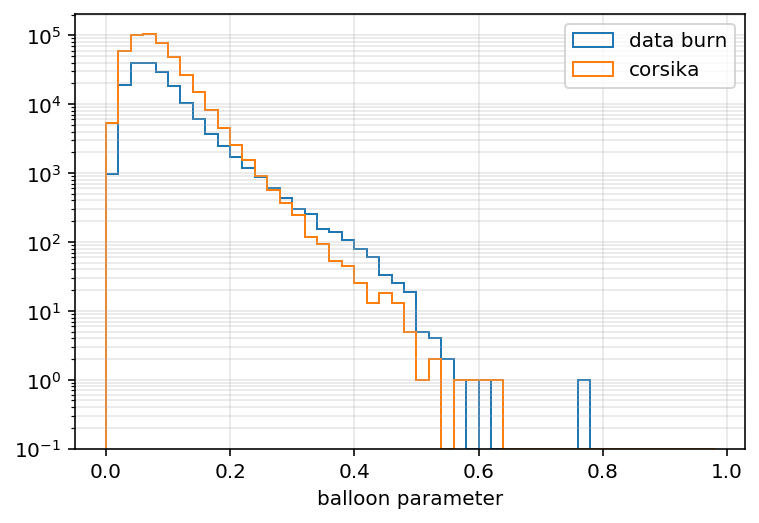

In [15]:
plt.hist(balloon_data_burn,histtype='step',bins=np.arange(0,1,0.02),log=True,label='data burn')
plt.hist(balloon_corsika,histtype='step',bins=np.arange(0,1,0.02),log=True,label='corsika')
plt.xlabel('balloon parameter')
plt.grid(True,which='both',zorder=0,alpha=0.3)
plt.legend()
plt.show()

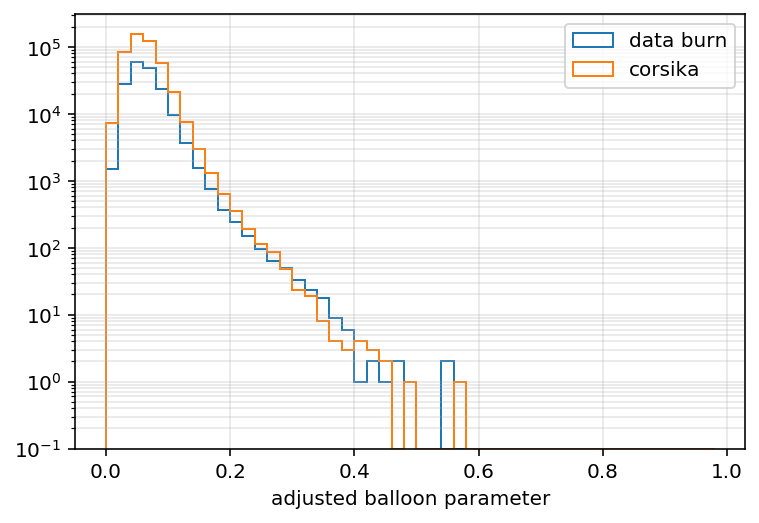

In [16]:
plt.hist(balloon_adjusted_data_burn,histtype='step',bins=np.arange(0,1,0.02),log=True,label='data burn')
plt.hist(balloon_adjusted_corsika,histtype='step',bins=np.arange(0,1,0.02),log=True,label='corsika')
plt.xlabel('adjusted balloon parameter')
plt.grid(True,which='both',zorder=0,alpha=0.3)
plt.legend()
plt.show()

# data/MC

In [17]:
plt.rcParams.update({'font.size': 14})
plt.rc('axes', axisbelow=True)

In [18]:
def sumw2(h,b,weight,quantity):
    w_2 = []
    for i in range(0,len(b)-1):
        all_weight_in_bin = weight[(b[i]<quantity)&(quantity<b[i+1])]
        w_2.append(np.sum(all_weight_in_bin**2))
    return w_2

In [19]:
def datamc(varmc,vardata,varname,bins):
    plt.figure(figsize=(7,7))

    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], wspace=0.0, hspace=0.1)
    ax1 = plt.subplot(gs[0])

    h,b,p = plt.hist(varmc,bins=bins,weights=weight_corsika,log=True,histtype='step',lw=2,label='CORSIKA',bottom=10**(-4),color='dodgerblue')
    plt.hist(varmc[CUT_H],bins=bins,weights=weight_corsika_H,log=True,histtype='step',lw=1,label='CORSIKA, H',bottom=10**(-4),color='red')
#     plt.hist(varmc[CUT_He],bins=bins,weights=weight_corsika_He,log=True,histtype='step',lw=1,label='CORSIKA, He',bottom=10**(-4),color='darkorange')
#     plt.hist(varmc[CUT_N],bins=bins,weights=weight_corsika_N,log=True,histtype='step',lw=1,label='CORSIKA, N',bottom=10**(-4),color='darkgreen')
#     plt.hist(varmc[CUT_Al],bins=bins,weights=weight_corsika_Al,log=True,histtype='step',lw=1,label='CORSIKA, Al',bottom=10**(-4),color='m')
    plt.hist(varmc[CUT_Fe],bins=bins,weights=weight_corsika_Fe,log=True,histtype='step',lw=1,label='CORSIKA, Fe',bottom=10**(-4),color='purple')
    
    hh,bb = np.histogram(vardata,bins=bins,weights = weight_data_burn)
    plt.plot((bb[1:]+bb[:-1])/2,hh,'.',ms=8,alpha=1,label='data burn',color='black')
    
    plt.ylabel('Events in 365 days')
    plt.xlim(np.min(bins),np.max(bins))
    plt.ylim(10**(-2),)
    plt.legend(prop={'size': 11})
    plt.title('data/MC comparison')
    plt.grid(True,which='both',zorder=0,alpha=0.3)
#     ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
#     ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax1.tick_params(labelbottom=False)    

    err_w = np.sqrt(sumw2(h,b,weight_corsika,varmc))
    err_ww = np.sqrt(sumw2(hh,bb,weight_data_burn,vardata))

    ax2 = plt.subplot(gs[1])
    
    bb = (bb[1:]+bb[:-1])/2 # shift bins
    cut_nozero = (hh>0)&(h>0)
    bb = bb[cut_nozero]
    err_w = err_w[cut_nozero]
    err_ww = err_ww[cut_nozero]
    h = h[cut_nozero]
    hh = hh[cut_nozero]
    
    yerr = np.sqrt((err_ww/h)**2 + (hh/h**2)**2 * err_w**2)
    plt.errorbar(bb, hh/h, yerr = yerr, fmt='o',ms=3,color='black',label='burn')
    plt.axhline(1,ls='--',lw=1,color='black')

    plt.xlabel(varname)
    plt.ylabel('Data/MC')
    plt.xlim(np.min(bins),np.max(bins))
    plt.ylim(0,2)
    plt.grid(True,which='both',zorder=0,alpha=0.3)
#     ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
#     ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

### stochasticity

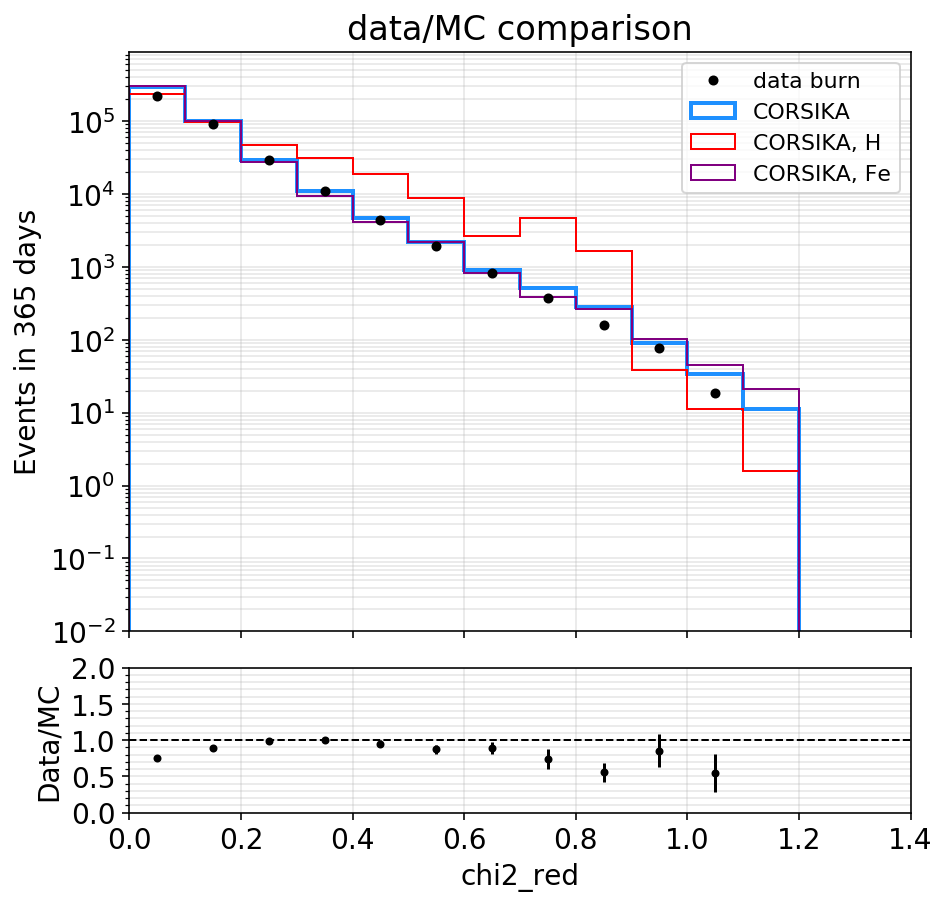

In [20]:
datamc(chi2_red_corsika,chi2_red_data_burn,'chi2_red',np.arange(0,1.5,0.1))

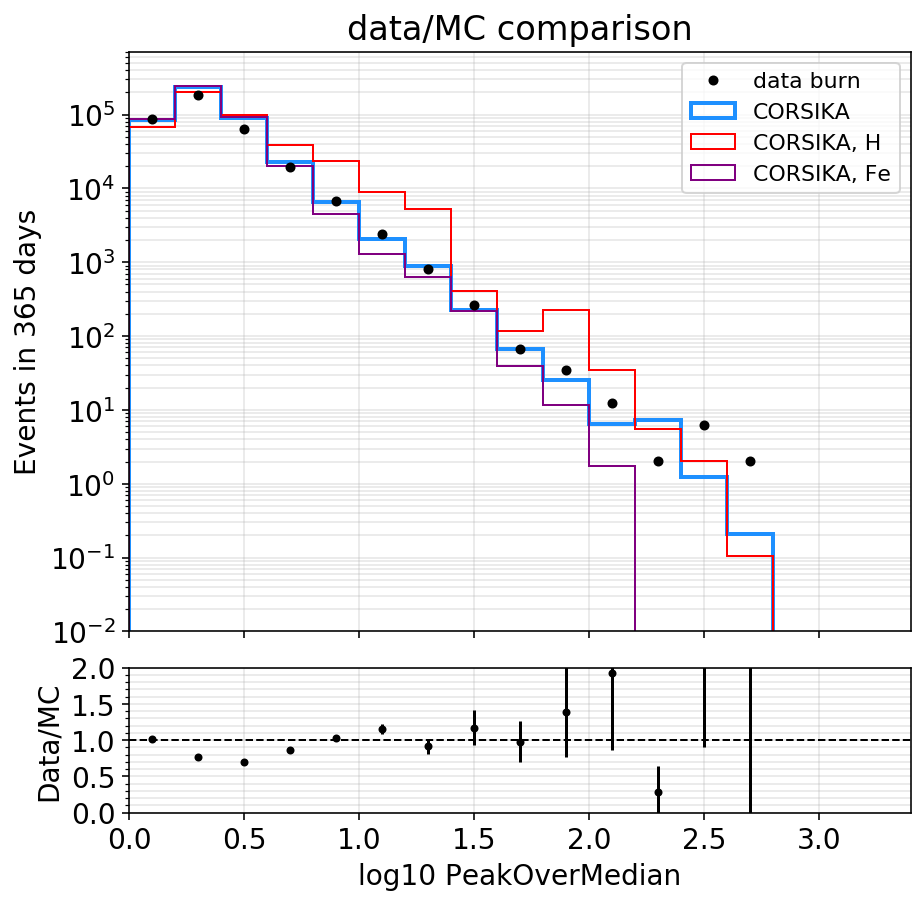

In [21]:
datamc(np.log10(PeakOverMedian_corsika),np.log10(PeakOverMedian_data_burn),'log10 PeakOverMedian',np.arange(0,3.5,0.2))

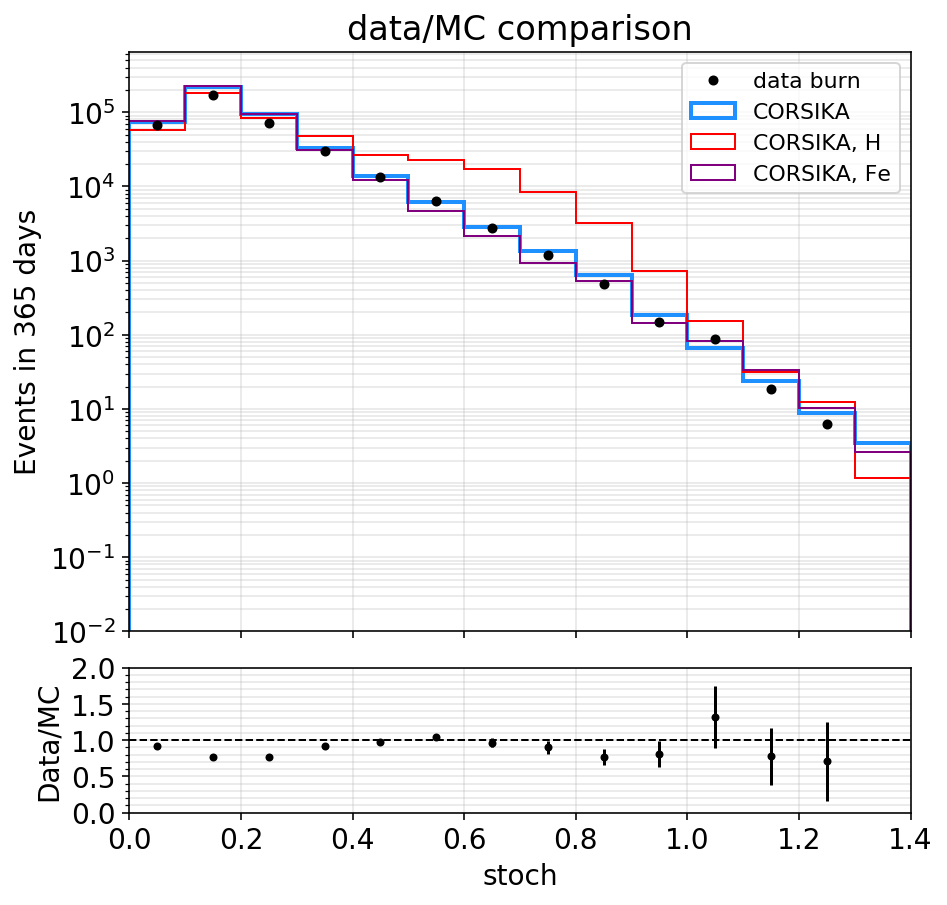

In [22]:
datamc(stoch_corsika,stoch_data_burn,'stoch',np.arange(0,1.5,0.1))

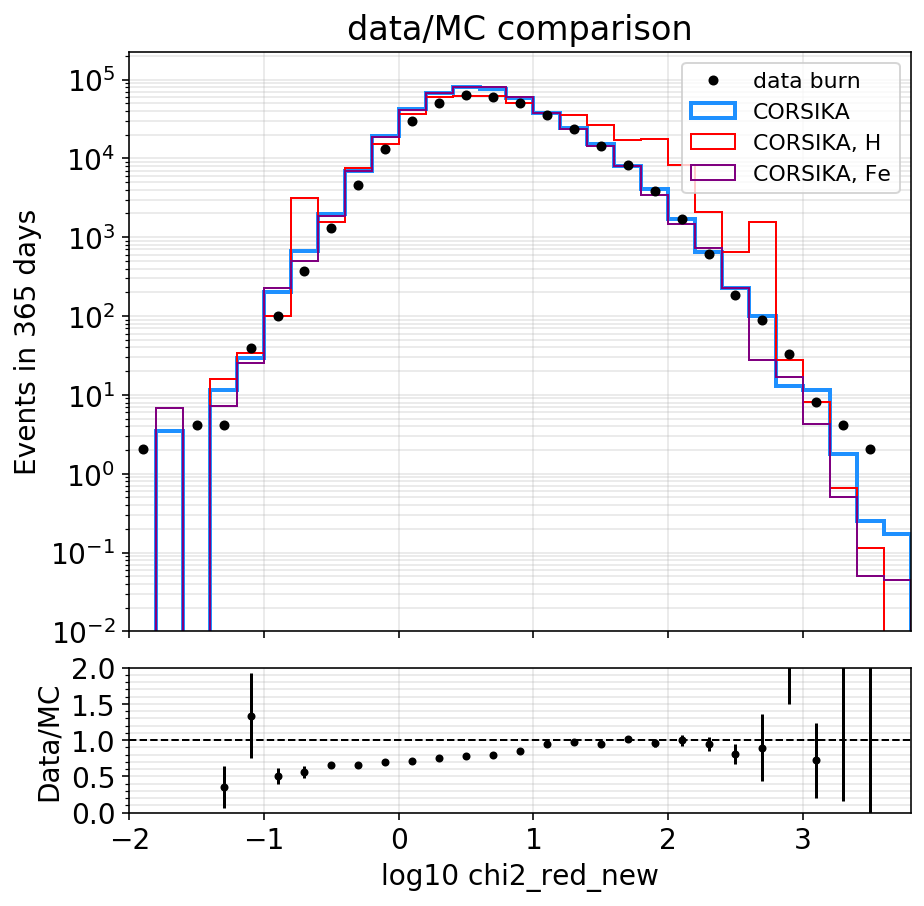

In [23]:
datamc(np.log10(chi2_red_new_corsika),np.log10(chi2_red_new_data_burn),'log10 chi2_red_new',np.arange(-2,4,0.2))

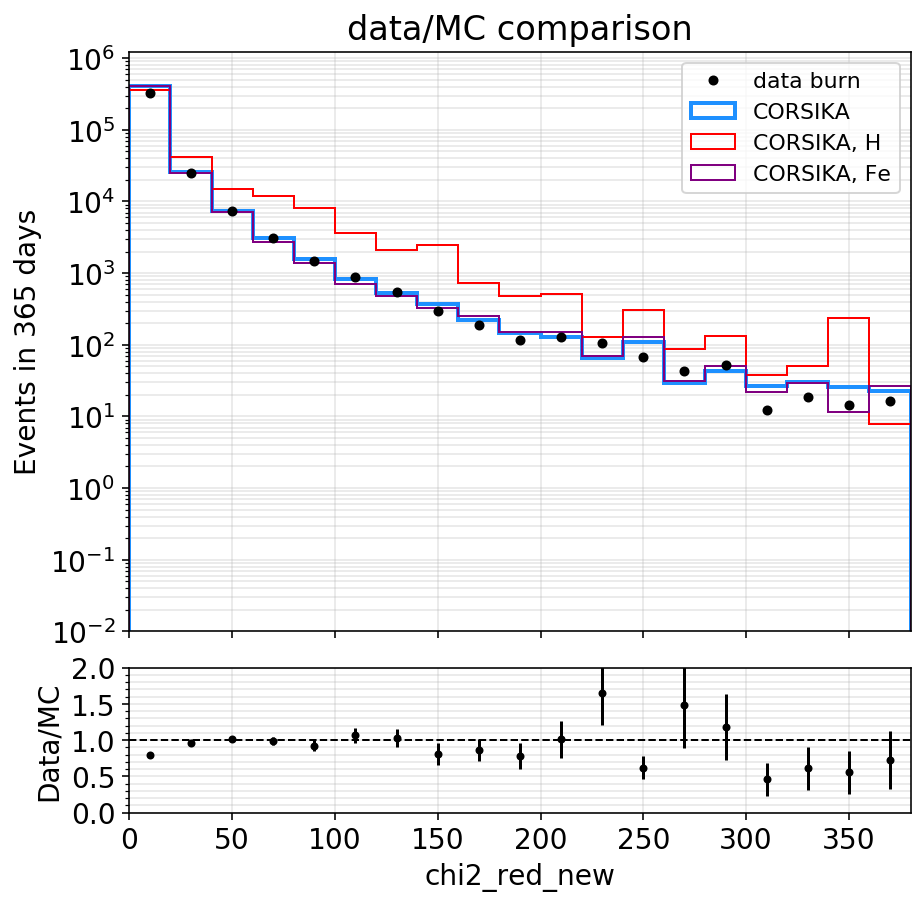

In [24]:
datamc(chi2_red_new_corsika,chi2_red_new_data_burn,'chi2_red_new',np.arange(0,400,20))

### energy variables 

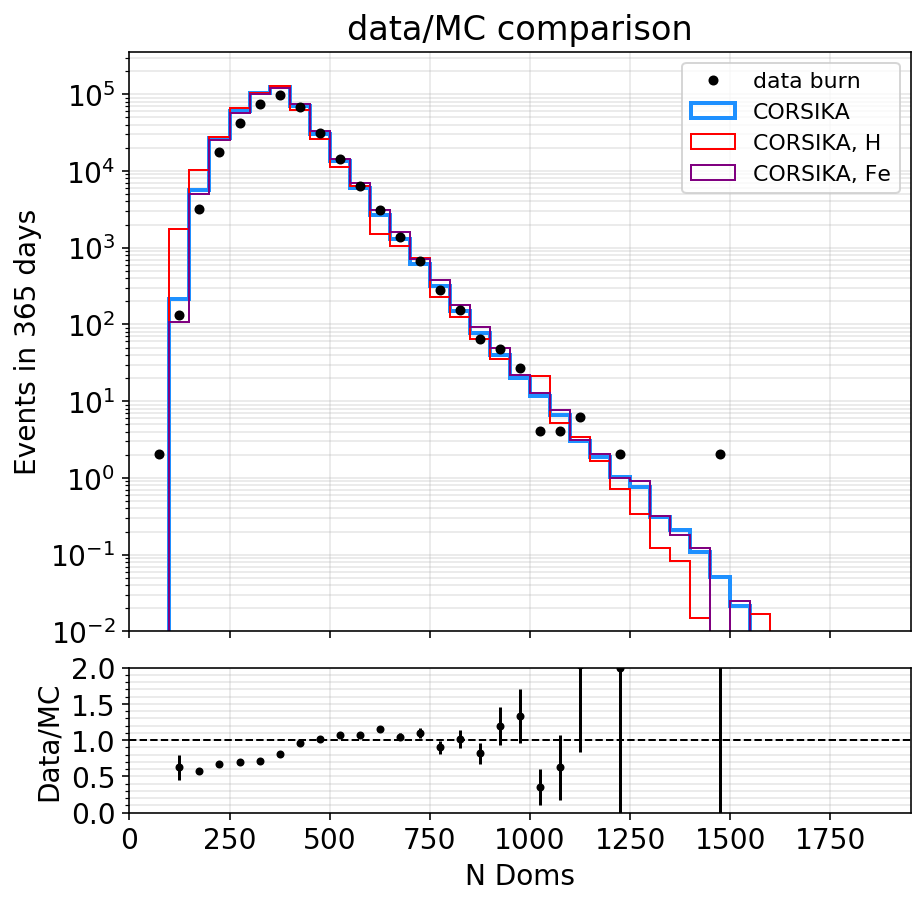

In [25]:
datamc(N_dom_corsika,N_dom_data_burn,'N Doms',np.arange(0,2000,50))

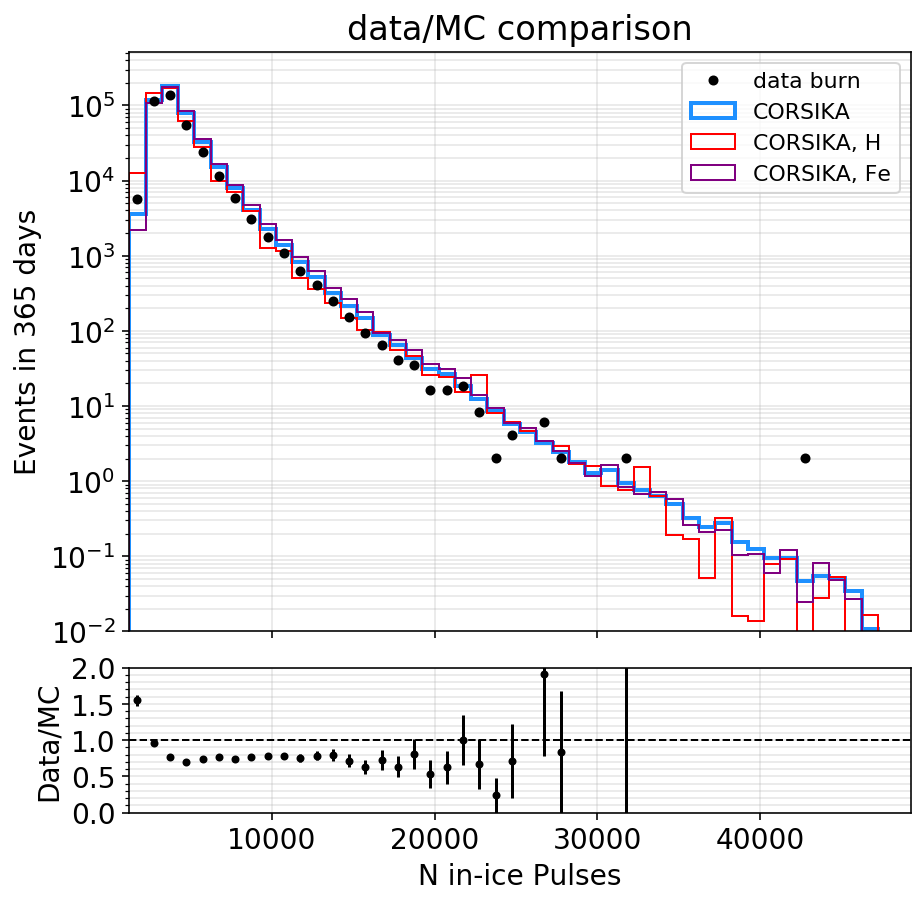

In [26]:
datamc(N_pulses_corsika,N_pulses_data_burn,'N in-ice Pulses',np.arange(1250,50000,1000))

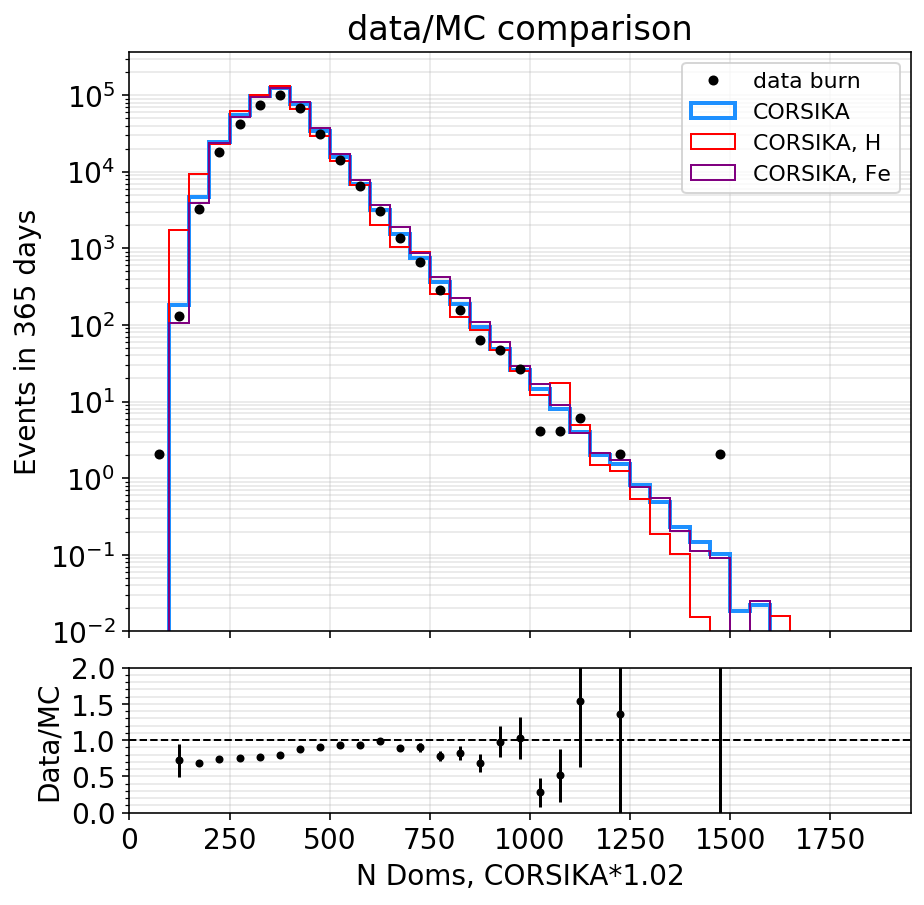

In [27]:
datamc(N_dom_corsika*1.02,N_dom_data_burn,'N Doms, CORSIKA*1.02',np.arange(0,2000,50))

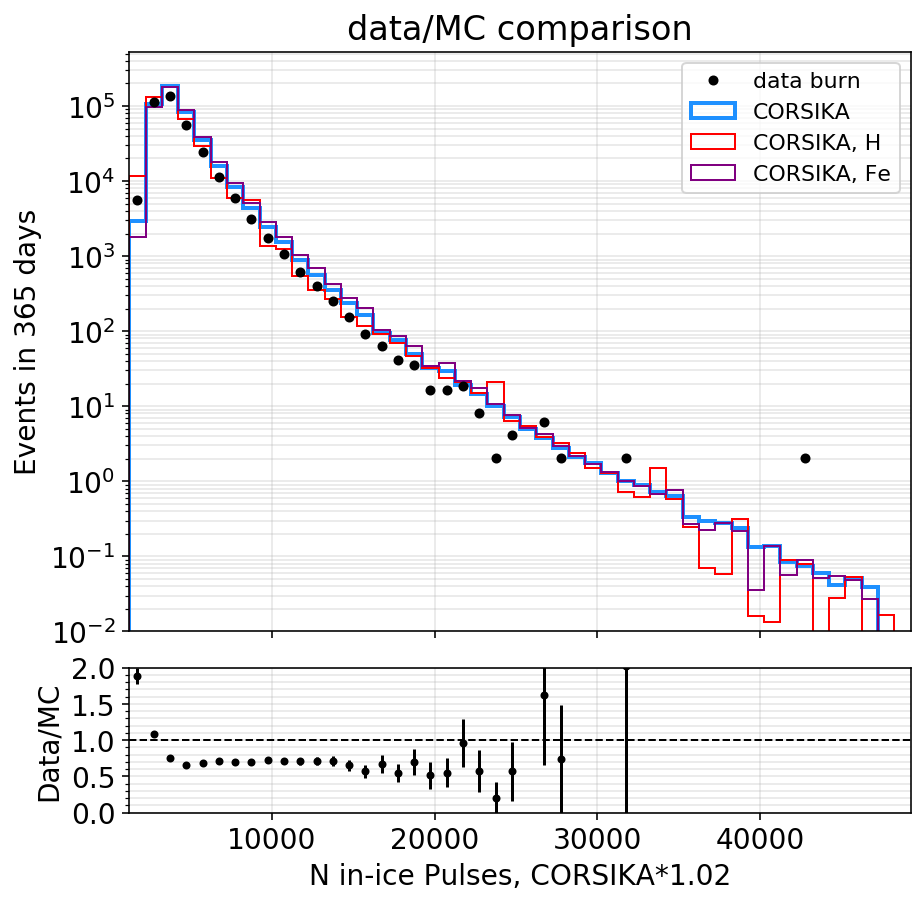

In [28]:
datamc(N_pulses_corsika*1.02,N_pulses_data_burn,'N in-ice Pulses, CORSIKA*1.02',np.arange(1250,50000,1000))

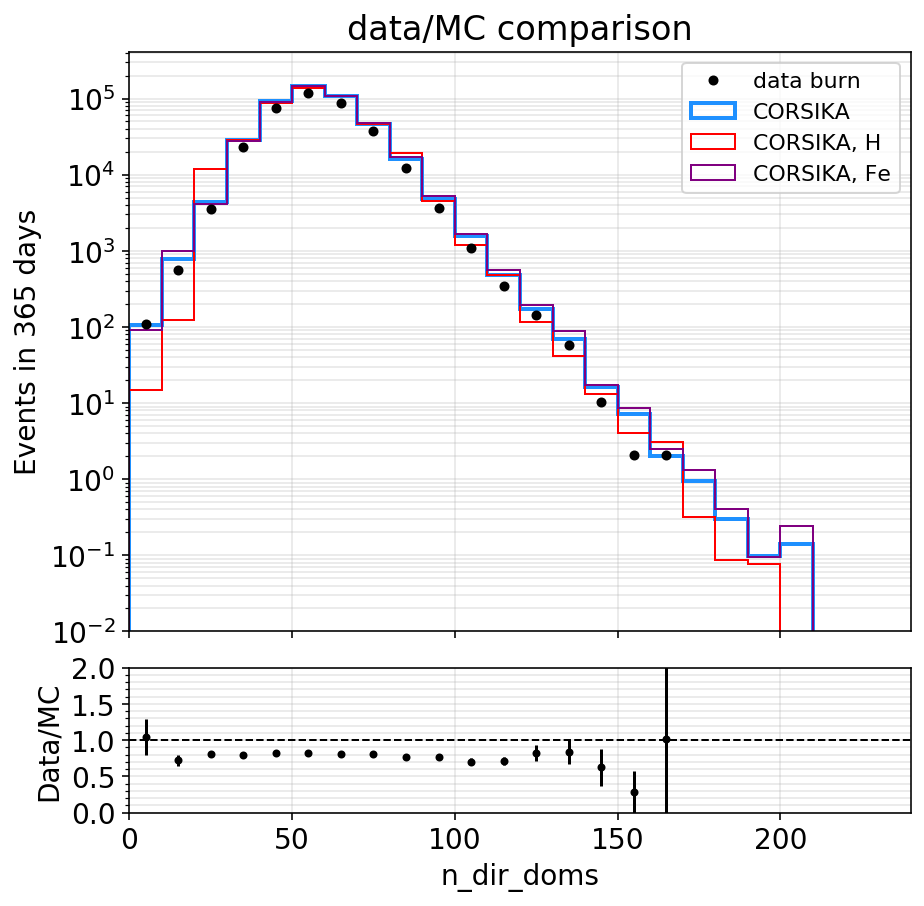

In [29]:
datamc(ndirdoms_corsika,ndirdoms_data_burn,'n_dir_doms',np.arange(0,250,10))

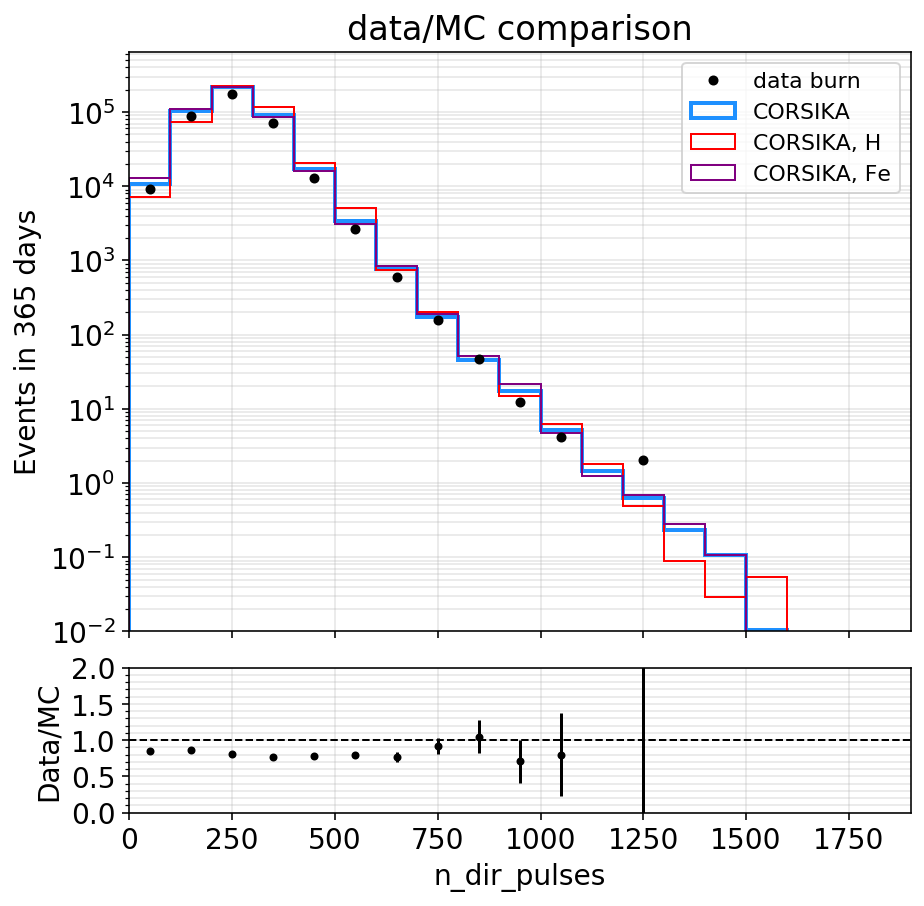

In [30]:
datamc(ndirpulses_corsika,ndirpulses_data_burn,'n_dir_pulses',np.arange(0,2000,100))

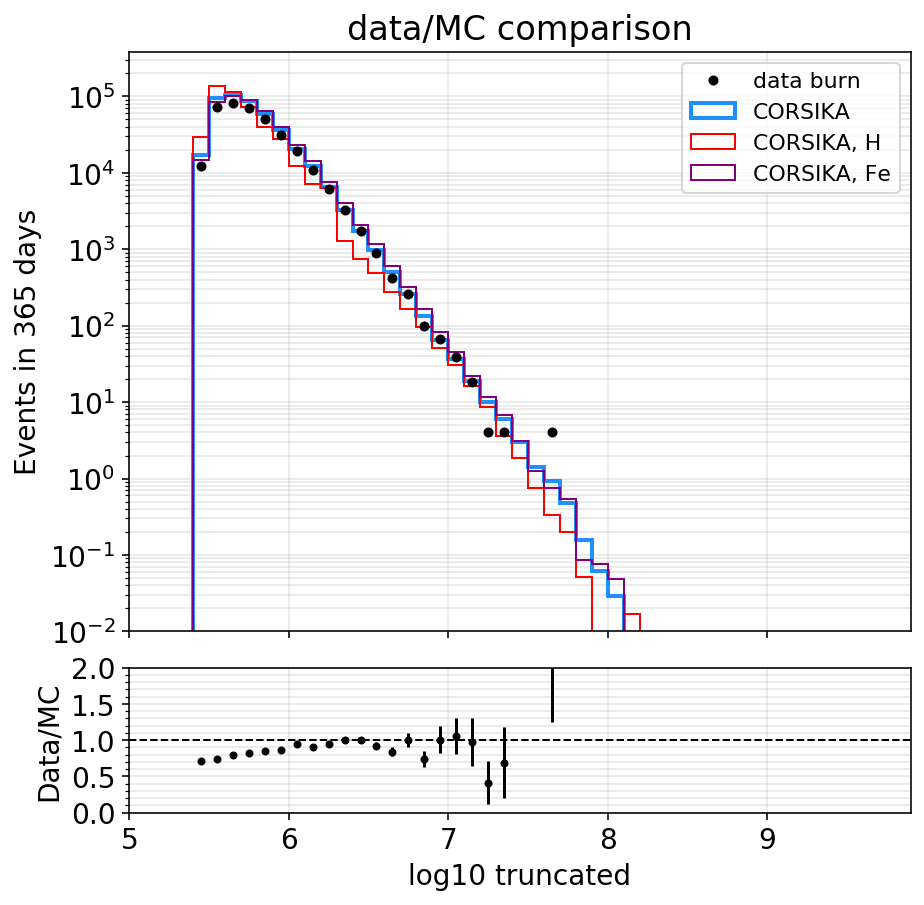

In [31]:
datamc(np.log10(truncated_muon_e_corsika),np.log10(truncated_muon_e_data_burn),'log10 truncated',np.arange(5,10,0.1))

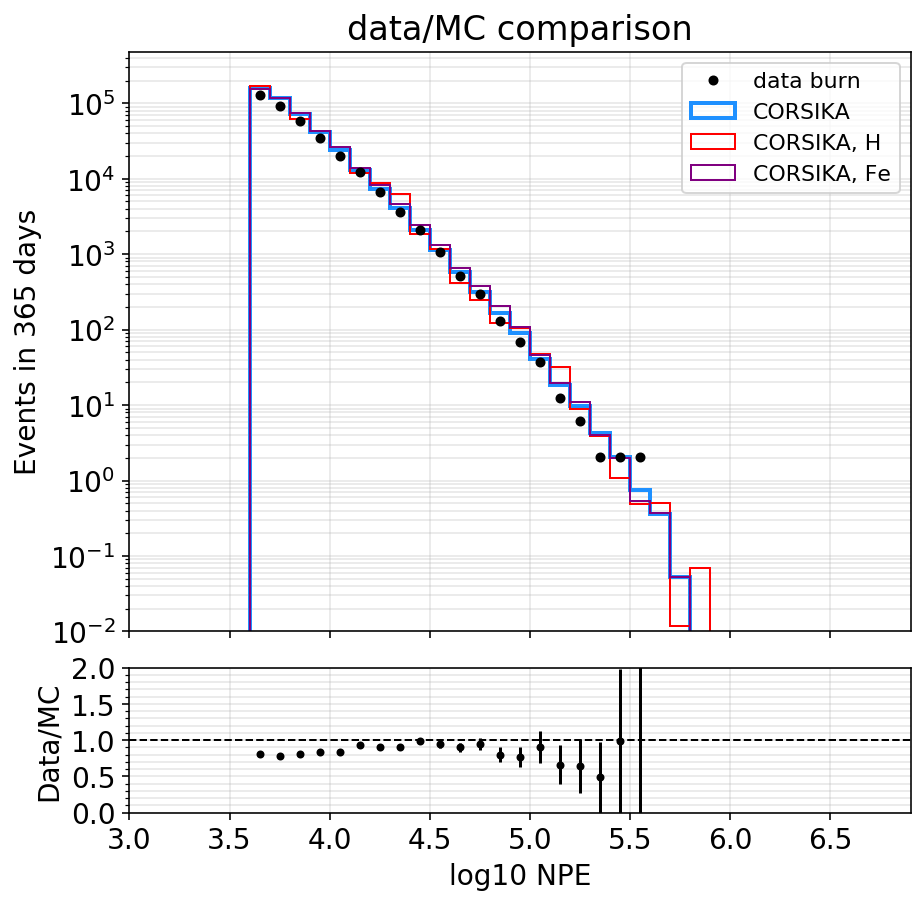

In [32]:
datamc(np.log10(NPE_corsika),np.log10(NPE_data_burn),'log10 NPE',np.arange(3,7,0.1))

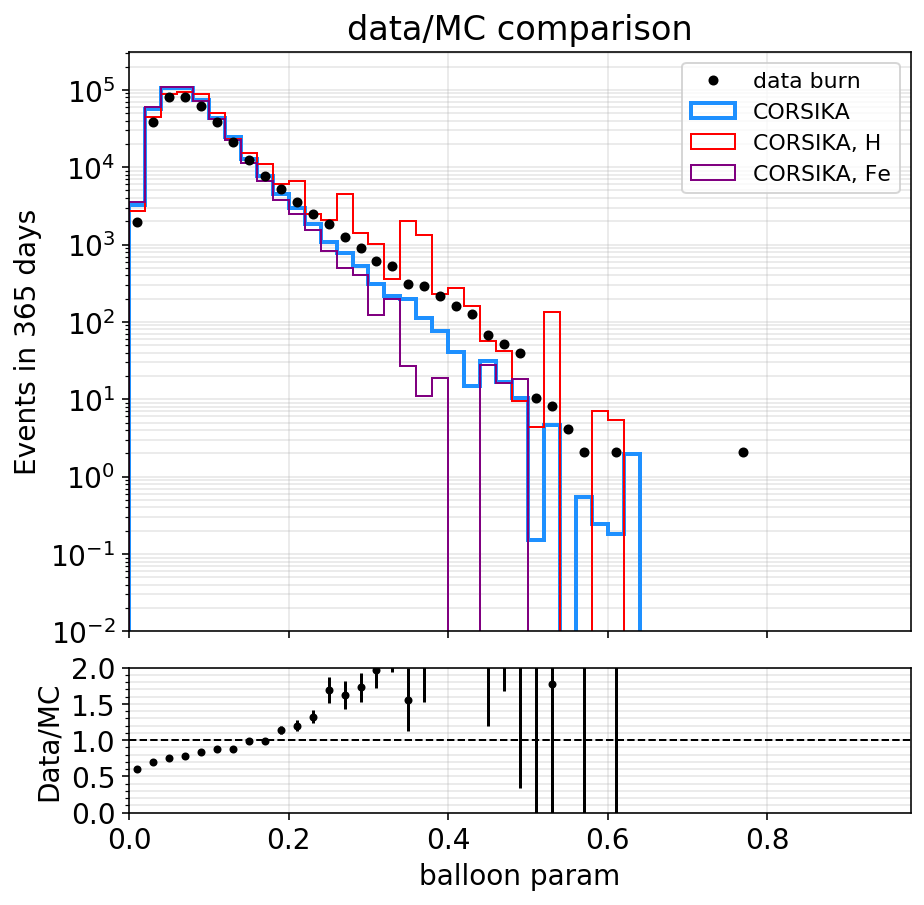

In [33]:
datamc(balloon_corsika,balloon_data_burn,'balloon param',np.arange(0,1,0.02))

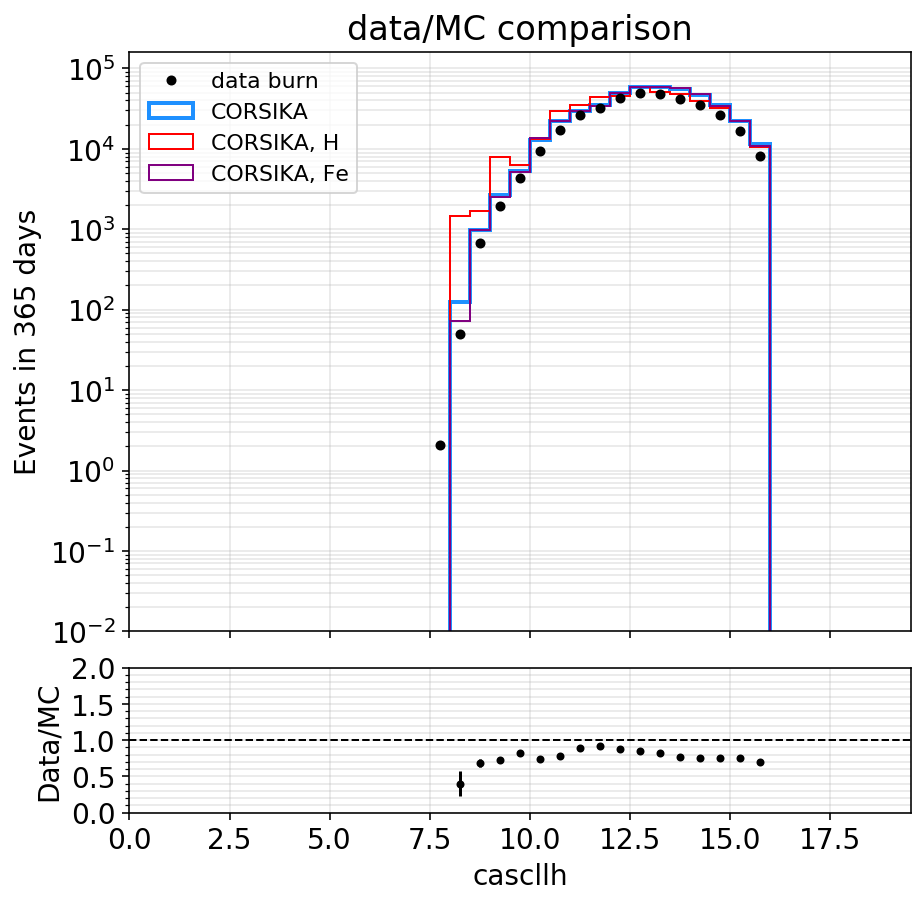

In [34]:
datamc(cascllh_corsika,cascllh_data_burn,'cascllh',np.arange(0,20,0.5))

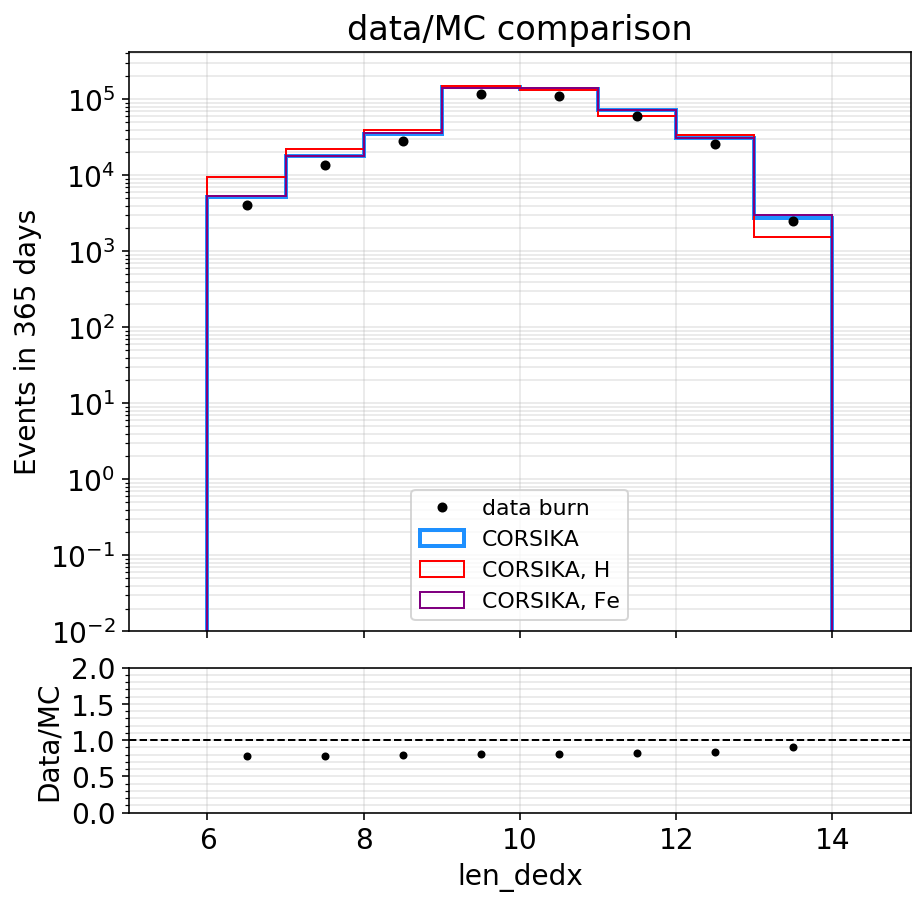

In [35]:
datamc(len_dedx_corsika,len_dedx_data_burn,'len_dedx',np.arange(5,16,1))

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


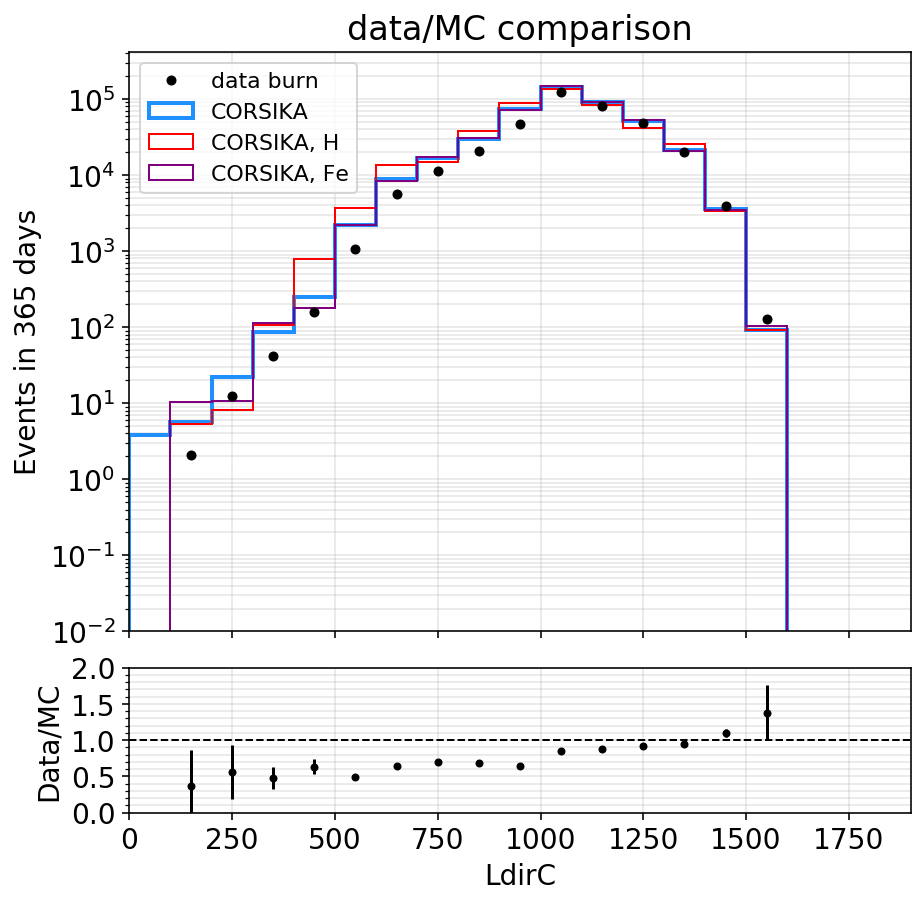

In [36]:
datamc(Ldir_corsika,Ldir_data_burn,'LdirC',np.arange(0,2000,100))

In [37]:
len_dedx_corsika[Ldir_corsika<300]

/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


array([ 6.,  6.,  6.,  6.,  8.,  7.,  6., 10.,  7.,  6.,  6.,  6.,  6.,
        7.,  9.,  6.,  7.,  8.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,
        8.,  6.,  8.,  6.,  7.,  7.])

In [38]:
print(*runid_corsika[Ldir_corsika<300],sep=',')
print(*eventid_corsika[Ldir_corsika<300],sep=',')

626.0,802.0,1633.0,1842.0,1959.0,2476.0,4261.0,5867.0,6514.0,6969.0,7133.0,7405.0,8001.0,8090.0,8287.0,9288.0,9839.0,10620.0,11720.0,11760.0,11971.0,12992.0,14736.0,15085.0,15778.0,16023.0,17316.0,18421.0,18584.0,18807.0,19014.0,19578.0
56,1414,1277,1973,2178,877,2070,1443,1825,1454,383,1193,1904,1898,2210,685,1960,2057,2156,350,69,1662,1784,1159,2179,1645,1707,1029,276,1624,471,2085


/Users/yang/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


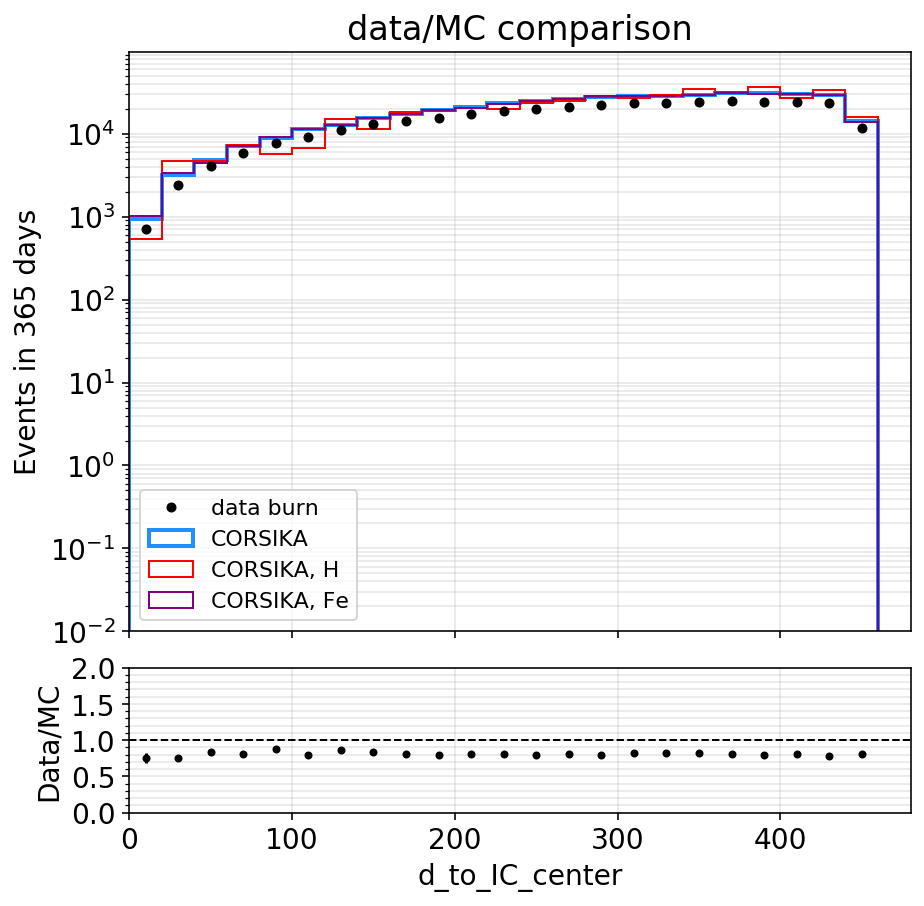

In [39]:
datamc(d_to_IC_center_corsika,d_to_IC_center_data_burn,'d_to_IC_center',np.arange(0,500,20))

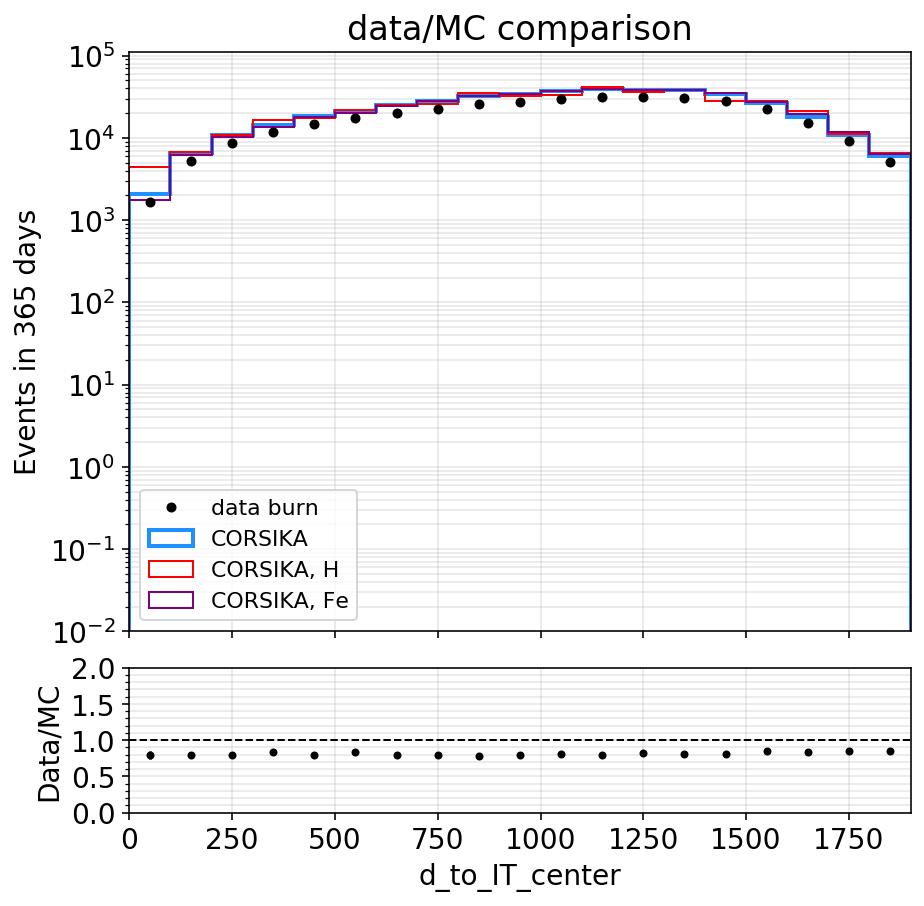

In [40]:
datamc(d_to_IT_center_corsika,d_to_IT_center_data_burn,'d_to_IT_center',np.arange(0,2000,100))

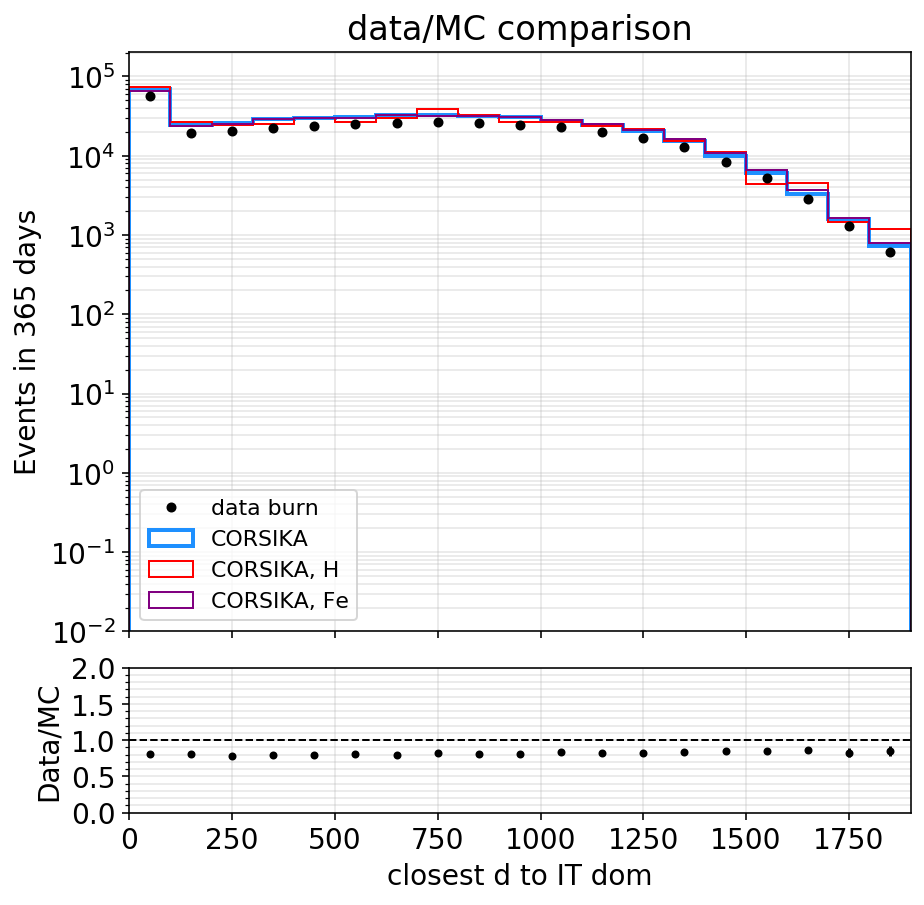

In [41]:
datamc(closest_d_corsika,closest_d_data_burn,'closest d to IT dom',np.arange(0,2000,100))

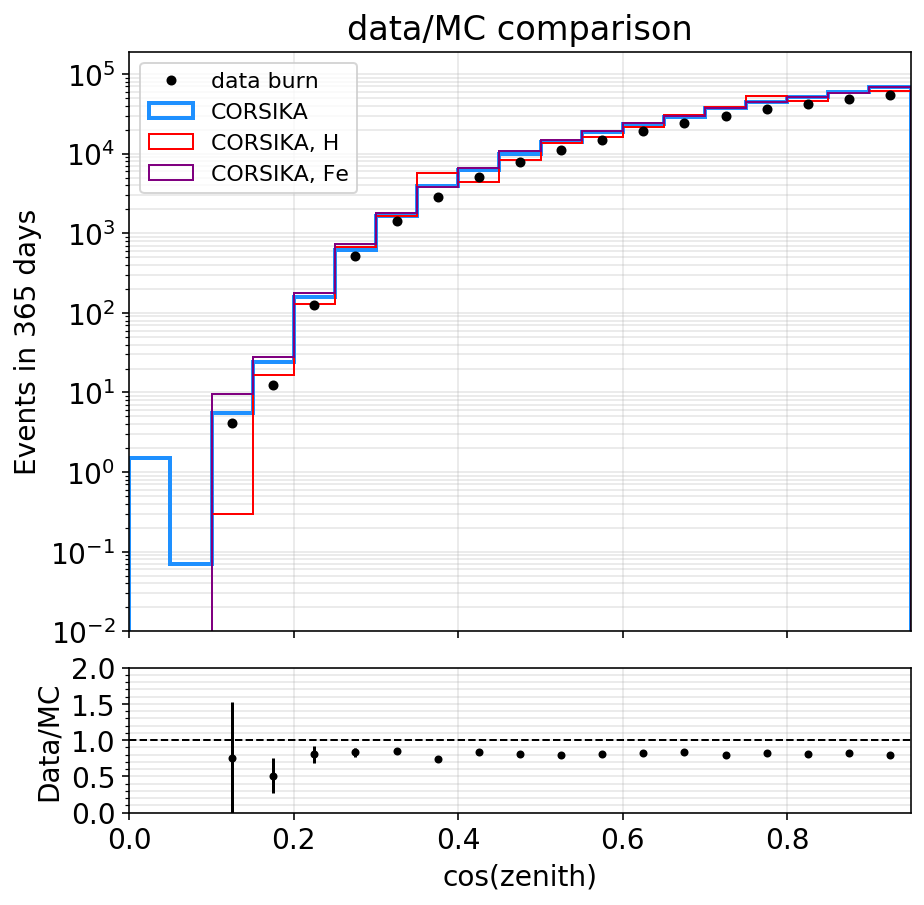

In [42]:
datamc(np.cos(zenith_corsika),np.cos(zenith_data_burn),'cos(zenith)',np.arange(0,1,0.05))

# Compare 2012/2016 MC

In [179]:
nevents = 1000000
with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/corsika_h5/corsika_11057_nocut.h5','r') as f:
    n_file = 74778 # with _rf, the size of broken file is 266K instead of 0! 
    
    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:nevents] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:nevents] < 15
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:nevents] < 450
#     CUT_coincident = f.root.MCPrimary_coincident.cols.value[:nevents]==0
    CUT_debug = f.root.Weight_GaisserH3a.cols.value[:nevents] > 0
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_debug #& CUT_coincident
    
    chi2_corsika_12 = f.root.Collection.cols.chi2[:nevents][CUT]
    chi2_red_corsika_12 = f.root.Collection.cols.chi2_red[:nevents][CUT]
    chi2_new_corsika_12 = f.root.Collection.cols.chi2_new[:nevents][CUT]
    chi2_red_new_corsika_12 = f.root.Collection.cols.chi2_red_new[:nevents][CUT]
    PeakOverMedian_corsika_12 = f.root.Collection.cols.PeakOverMedian[:nevents][CUT]
    PeakOverMean_corsika_12 = f.root.Collection.cols.PeakOverMean[:nevents][CUT]
    stoch_corsika_12 = (chi2_red_corsika_12 + (np.log10(PeakOverMedian_corsika_12)/2))/np.sqrt(2)
    stoch_new_corsika_12 = (np.log10(chi2_red_new_corsika_12)/2 + (np.log10(PeakOverMedian_corsika_12)))/np.sqrt(2)

#     loss_0_corsika_12 = f.root.Collection.cols.EnergyLoss_0[:nevents][CUT]
#     loss_1_corsika_12 = f.root.Collection.cols.EnergyLoss_1[:nevents][CUT]
#     loss_2_corsika_12 = f.root.Collection.cols.EnergyLoss_2[:nevents][CUT]
#     loss_3_corsika_12 = f.root.Collection.cols.EnergyLoss_3[:nevents][CUT]
#     loss_4_corsika_12 = f.root.Collection.cols.EnergyLoss_4[:nevents][CUT]
#     loss_5_corsika_12 = f.root.Collection.cols.EnergyLoss_5[:nevents][CUT]
#     loss_6_corsika_12 = f.root.Collection.cols.EnergyLoss_6[:nevents][CUT]
#     loss_7_corsika_12 = f.root.Collection.cols.EnergyLoss_7[:nevents][CUT]
#     loss_8_corsika_12 = f.root.Collection.cols.EnergyLoss_8[:nevents][CUT]
#     loss_9_corsika_12 = f.root.Collection.cols.EnergyLoss_9[:nevents][CUT]
#     loss_10_corsika_12 = f.root.Collection.cols.EnergyLoss_10[:nevents][CUT]
#     loss_11_corsika_12 = f.root.Collection.cols.EnergyLoss_11[:nevents][CUT]
#     loss_12_corsika_12 = f.root.Collection.cols.EnergyLoss_12[:nevents][CUT]
#     loss_13_corsika_12 = f.root.Collection.cols.EnergyLoss_13[:nevents][CUT]
#     loss_14_corsika_12 = f.root.Collection.cols.EnergyLoss_14[:nevents][CUT]
    
    zenith_corsika_12 = f.root.SplineMPE.cols.zenith[:nevents][CUT]
    truncated_muon_e_corsika_12 = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:nevents][CUT]
    len_dedx_corsika_12 = f.root.Collection.cols.len_dEdxVector[:nevents][CUT]
    cascllh_corsika_12 = f.root.CascadeLlhVertexFitParams.cols.rlogL[:nevents][CUT]
    NPE_corsika_12 = f.root.QTot.cols.value[:nevents][CUT]
    Qtot_corsika_12 = f.root.Balloon.cols.InIceTotalCharge[:nevents][CUT]
    N_dom_corsika_12 = f.root.Balloon.cols.N_Doms[:nevents][CUT]
    N_pulses_corsika_12 = f.root.Balloon.cols.N_Pulses[:nevents][CUT]
    balloon_corsika_12 = f.root.Balloon.cols.InIceBalloonParameter[:nevents][CUT]
    balloon_adjusted_corsika_12 = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:nevents][CUT]
    in_ice_total_charge_corsika_12 = f.root.Balloon.cols.InIceTotalCharge[:nevents][CUT]
    in_ice_total_charge_reduced_corsika_12 = f.root.Balloon.cols.InIceTotalCharge_reduced[:nevents][CUT]
    ndirdoms_corsika_12 = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:nevents][CUT]
    ndirpulses_corsika_12 = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:nevents][CUT]
    
    closest_d_corsika_12 = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:nevents][CUT]
    d_to_IC_center_corsika_12 = f.root.Dist_to_IC_center.cols.value[:nevents][CUT]
    d_to_IT_center_corsika_12 = f.root.Dist_to_IT_center.cols.value[:nevents][CUT]
    Ldir_corsika_12 = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:nevents][CUT]
    coincident_corsika_12 = f.root.MCPrimary_coincident.cols.value[:nevents][CUT]
    prim_e_corsika_12 = f.root.MCPrimary_new.cols.energy[:nevents][CUT]
    
    E_bundle_corsika_12 = f.root.Bundle.cols.MuonBundleEnergy_Ei[:nevents][CUT]
    E_leading_muon_corsika_12 = f.root.Bundle.cols.MostEnergeticMuonEnergy_i[:nevents][CUT]
    singleness_corsika_12 = f.root.Bundle.cols.Singleness_Ei[:nevents][CUT]
    bsize_corsika_12 = f.root.Bundle.cols.Size_Ei[:nevents][CUT]
    xf_corsika_12 = E_bundle_corsika_12/prim_e_corsika_12
    E_shower_corsika_12 = prim_e_corsika_12 - E_bundle_corsika_12 # surface shower
    
    runid_corsika_12 = f.root.FileNumber.cols.value[:nevents][CUT]
    eventid_corsika_12 = f.root.FileNumber.cols.Event[:nevents][CUT]
    
    weight_corsika_12 = f.root.Weight_GaisserH3a.cols.value[:nevents][CUT] #* lifetime/n_file # * 903098/363528


KeyboardInterrupt: 

In [ ]:
with tables.open_file('/Users/yang/Desktop/IceCube/Codes/my_proj/analysis_1_downgoing_neutrino/data/corsika_h5/corsika_20778.h5','r') as f:
    n_file = 20216 

    CUT_dedx = f.root.Collection.cols.len_dEdxVector[:nevents] >= 6
    CUT_cascllh = f.root.CascadeLlhVertexFitParams.cols.rlogL[:nevents] < 15
    CUT_d_IC = f.root.Dist_to_IC_center.cols.value[:nevents] < 450
#     CUT_coincident = f.root.MCPrimary_coincident.cols.value[:nevents]==0
    CUT_debug = f.root.Weight_GaisserH3a.cols.value[:nevents] > 0
    
    CUT = CUT_dedx & CUT_cascllh & CUT_d_IC & CUT_debug #& CUT_coincident
    
    chi2_corsika_16 = f.root.Collection.cols.chi2[:nevents][CUT]
    chi2_red_corsika_16 = f.root.Collection.cols.chi2_red[:nevents][CUT]
    chi2_new_corsika_16 = f.root.Collection.cols.chi2_new[:nevents][CUT]
    chi2_red_new_corsika_16 = f.root.Collection.cols.chi2_red_new[:nevents][CUT]
    PeakOverMedian_corsika_16 = f.root.Collection.cols.PeakOverMedian[:nevents][CUT]
    PeakOverMean_corsika_16 = f.root.Collection.cols.PeakOverMean[:nevents][CUT]
    stoch_corsika_16 = (chi2_red_corsika_16 + (np.log10(PeakOverMedian_corsika_16)/2))/np.sqrt(2)
    stoch_new_corsika_16 = (np.log10(chi2_red_new_corsika_16)/2 + (np.log10(PeakOverMedian_corsika_16)))/np.sqrt(2)

#     loss_0_corsika_16 = f.root.Collection.cols.EnergyLoss_0[:nevents][CUT]
#     loss_1_corsika_16 = f.root.Collection.cols.EnergyLoss_1[:nevents][CUT]
#     loss_2_corsika_16 = f.root.Collection.cols.EnergyLoss_2[:nevents][CUT]
#     loss_3_corsika_16 = f.root.Collection.cols.EnergyLoss_3[:nevents][CUT]
#     loss_4_corsika_16 = f.root.Collection.cols.EnergyLoss_4[:nevents][CUT]
#     loss_5_corsika_16 = f.root.Collection.cols.EnergyLoss_5[:nevents][CUT]
#     loss_6_corsika_16 = f.root.Collection.cols.EnergyLoss_6[:nevents][CUT]
#     loss_7_corsika_16 = f.root.Collection.cols.EnergyLoss_7[:nevents][CUT]
#     loss_8_corsika_16 = f.root.Collection.cols.EnergyLoss_8[:nevents][CUT]
#     loss_9_corsika_16 = f.root.Collection.cols.EnergyLoss_9[:nevents][CUT]
#     loss_10_corsika_16 = f.root.Collection.cols.EnergyLoss_10[:nevents][CUT]
#     loss_11_corsika_16 = f.root.Collection.cols.EnergyLoss_11[:nevents][CUT]
#     loss_12_corsika_16 = f.root.Collection.cols.EnergyLoss_12[:nevents][CUT]
#     loss_13_corsika_16 = f.root.Collection.cols.EnergyLoss_13[:nevents][CUT]
#     loss_14_corsika_16 = f.root.Collection.cols.EnergyLoss_14[:nevents][CUT]
    
    zenith_corsika_16 = f.root.SplineMPE.cols.zenith[:nevents][CUT]
    truncated_muon_e_corsika_16 = f.root.SplineMPETruncatedEnergy_SPICEMie_BINS_Muon.cols.energy[:nevents][CUT]
    len_dedx_corsika_16 = f.root.Collection.cols.len_dEdxVector[:nevents][CUT]
    cascllh_corsika_16 = f.root.CascadeLlhVertexFitParams.cols.rlogL[:nevents][CUT]
    NPE_corsika_16 = f.root.QTot.cols.value[:nevents][CUT]
    Qtot_corsika_16 = f.root.Balloon.cols.InIceTotalCharge[:nevents][CUT]
    N_dom_corsika_16 = f.root.Balloon.cols.N_Doms[:nevents][CUT]
    N_pulses_corsika_16 = f.root.Balloon.cols.N_Pulses[:nevents][CUT]
    balloon_corsika_16 = f.root.Balloon.cols.InIceBalloonParameter[:nevents][CUT]
    balloon_adjusted_corsika_16 = f.root.Balloon.cols.InIceBalloonParameter_adjusted[:nevents][CUT]
    in_ice_total_charge_corsika_16 = f.root.Balloon.cols.InIceTotalCharge[:nevents][CUT]
    in_ice_total_charge_reduced_corsika_16 = f.root.Balloon.cols.InIceTotalCharge_reduced[:nevents][CUT]
    ndirdoms_corsika_16 = f.root.SplineMPEDirectHitsC.cols.n_dir_doms[:nevents][CUT]
    ndirpulses_corsika_16 = f.root.SplineMPEDirectHitsC.cols.n_dir_pulses[:nevents][CUT]
    
    closest_d_corsika_16 = f.root.Closest_approach_dist_to_nearest_IT_dom.cols.value[:nevents][CUT]
    d_to_IC_center_corsika_16 = f.root.Dist_to_IC_center.cols.value[:nevents][CUT]
    d_to_IT_center_corsika_16 = f.root.Dist_to_IT_center.cols.value[:nevents][CUT]
    Ldir_corsika_16 = f.root.SplineMPEDirectHitsC.cols.dir_track_length[:nevents][CUT]
    coincident_corsika_16 = f.root.MCPrimary_coincident.cols.value[:nevents][CUT]
    prim_e_corsika_16 = f.root.MCPrimary_new.cols.energy[:nevents][CUT]
    
    E_bundle_corsika_16 = f.root.Bundle.cols.MuonBundleEnergy_Ei[:nevents][CUT]
    E_leading_muon_corsika_16 = f.root.Bundle.cols.MostEnergeticMuonEnergy_i[:nevents][CUT]
    singleness_corsika_16 = f.root.Bundle.cols.Singleness_Ei[:nevents][CUT]
    bsize_corsika_16 = f.root.Bundle.cols.Size_Ei[:nevents][CUT]
    xf_corsika_16 = E_bundle_corsika_16/prim_e_corsika_16
    E_shower_corsika_16 = prim_e_corsika_16 - E_bundle_corsika_16 # surface shower
    
    runid_corsika_16 = f.root.FileNumber.cols.value[:nevents][CUT]
    eventid_corsika_16 = f.root.FileNumber.cols.Event[:nevents][CUT]
    
#     weight_corsika_16 = f.root.Weight_GaisserH3a.cols.value[:nevents][CUT] #* lifetime/n_file # * 903098/363528
    weight_corsika_16 = np.sum(weight_corsika_12) * np.ones(len(zenith_corsika_16))/len(zenith_corsika_16)


In [ ]:
def compare(var12,var16,varname,bins):
    plt.figure(figsize=(7,7))

    plt.hist(var12,bins=bins,weights=weight_corsika_12,histtype='step',log=True,lw=2,label='CORSIKA 2012',bottom=10**(-6),color='dodgerblue')
    plt.hist(var16,bins=bins,weights=weight_corsika_16,histtype='step',log=True,lw=2,label='CORSIKA 2016',bottom=10**(-6),color='darkorange')
    
    plt.xlabel(varname)
    plt.ylabel('N event')
    plt.xlim(np.min(bins),np.max(bins))
    plt.ylim(10**(-3),)
    plt.legend(prop={'size': 11},loc='best')
    plt.title('CORSIKA 2012/2016 comparison')
    plt.grid(True,which='both',zorder=0,alpha=0.3) 
    

In [ ]:
compare(chi2_red_corsika_12,chi2_red_corsika_16,'chi2_red',np.arange(0,1.5,0.05))

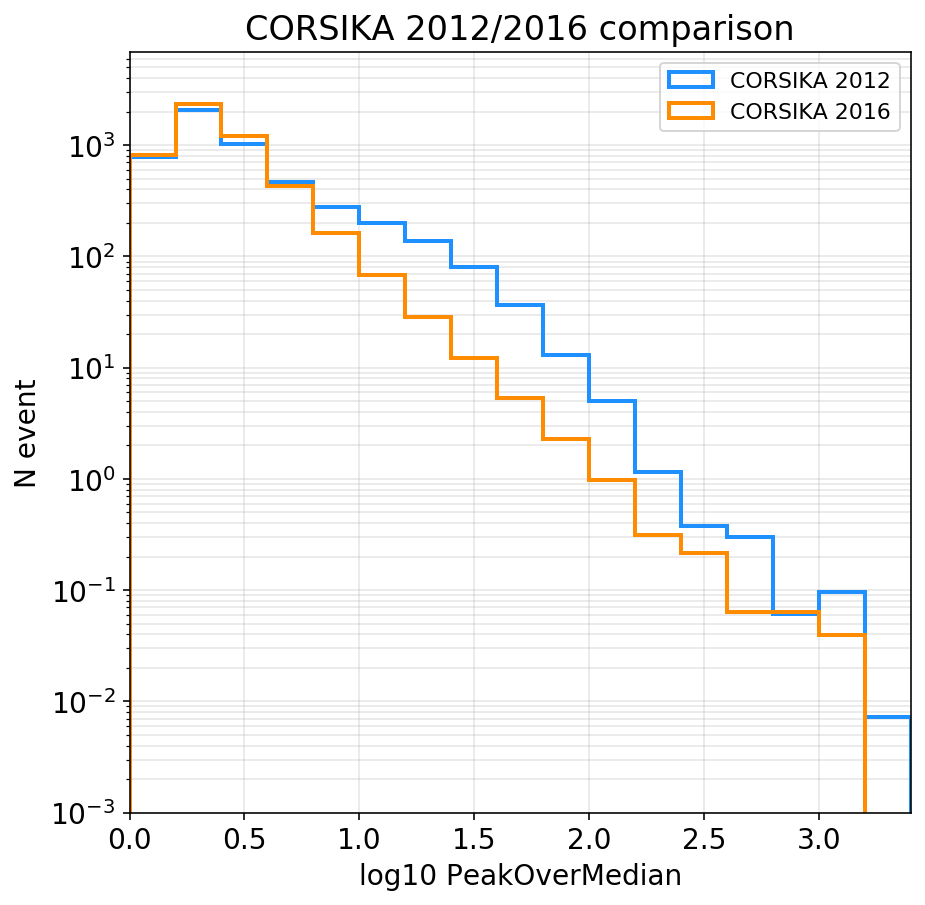

In [441]:
compare(np.log10(PeakOverMedian_corsika_12),np.log10(PeakOverMedian_corsika_16),'log10 PeakOverMedian',np.arange(0,3.5,0.2))

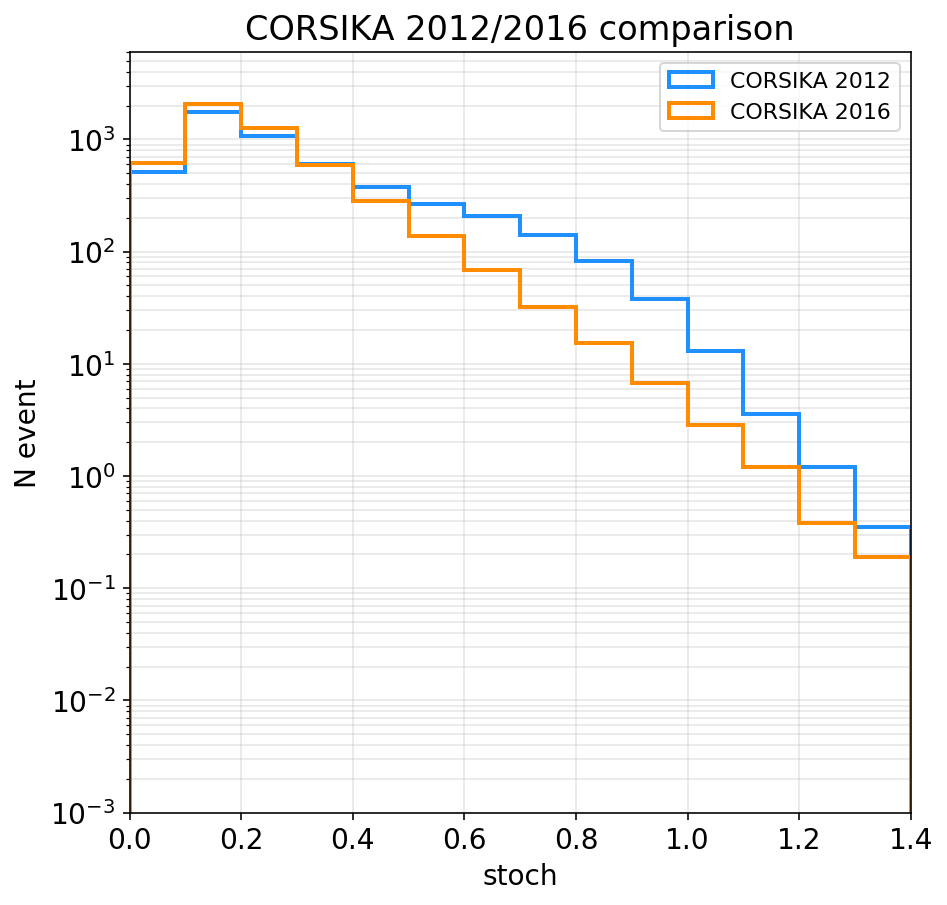

In [442]:
compare(stoch_corsika_12,stoch_corsika_16,'stoch',np.arange(0,1.5,0.1))

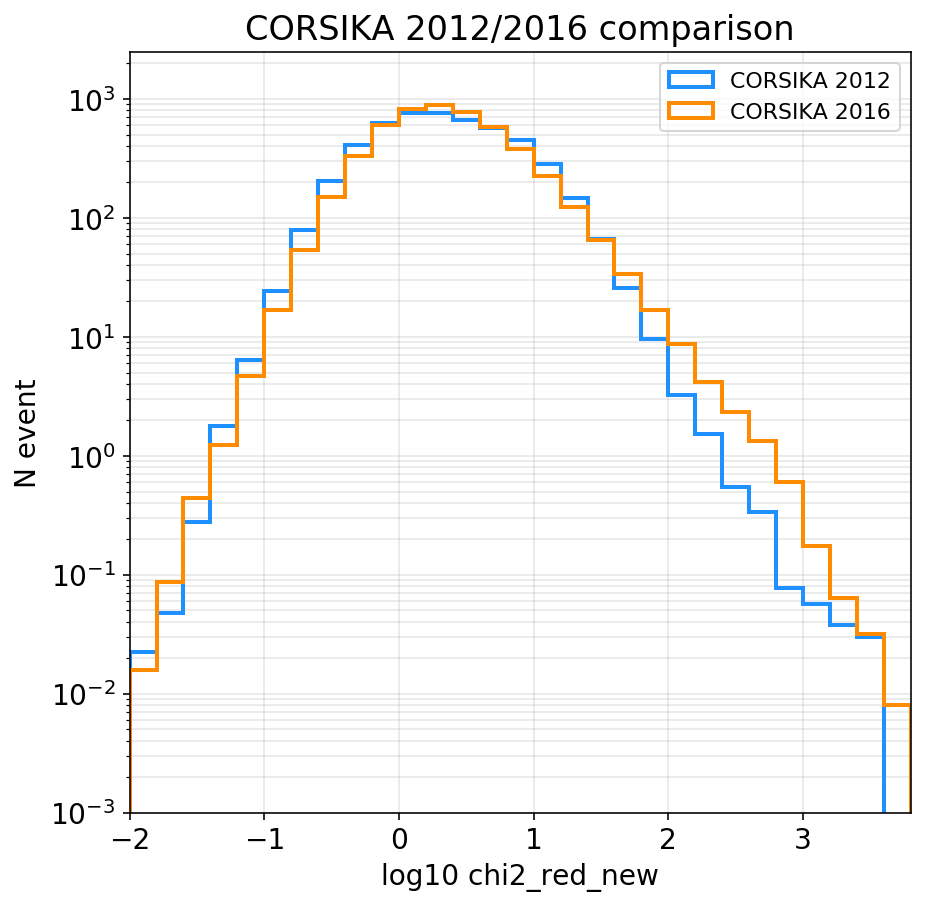

In [443]:
compare(np.log10(chi2_red_new_corsika_12),np.log10(chi2_red_new_corsika_16),'log10 chi2_red_new',np.arange(-2,4,0.2))

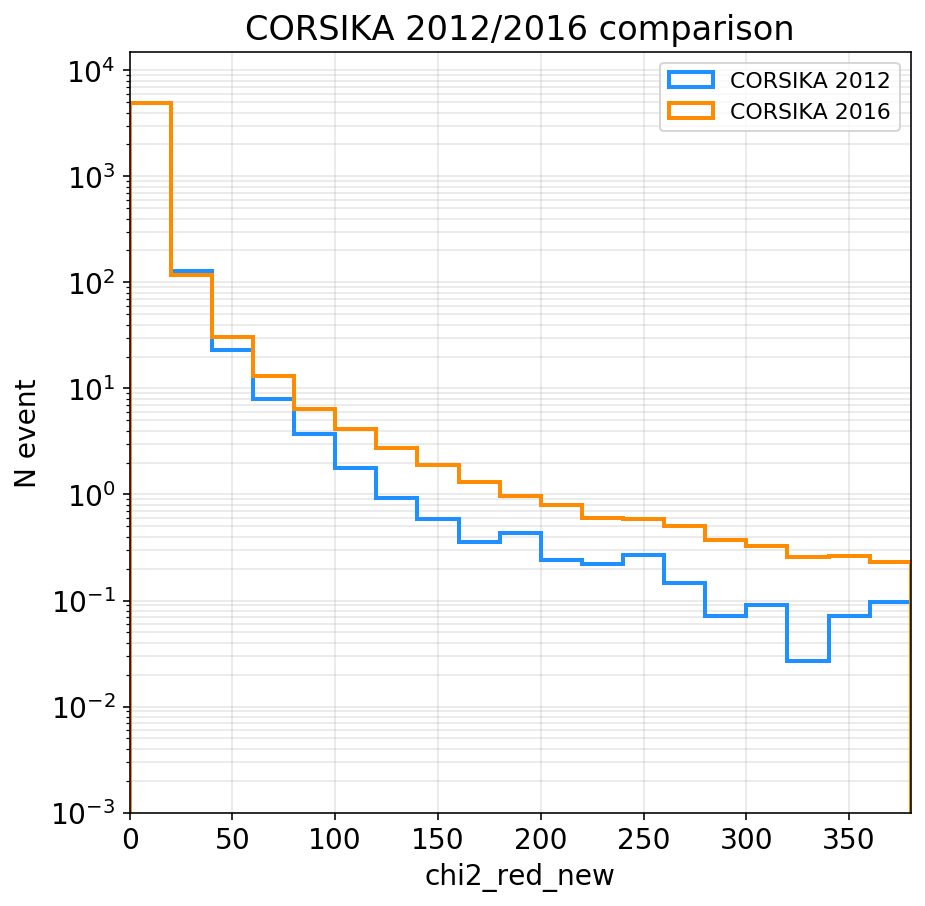

In [444]:
compare(chi2_red_new_corsika_12,chi2_red_new_corsika_16,'chi2_red_new',np.arange(0,400,20))

### energy variables 

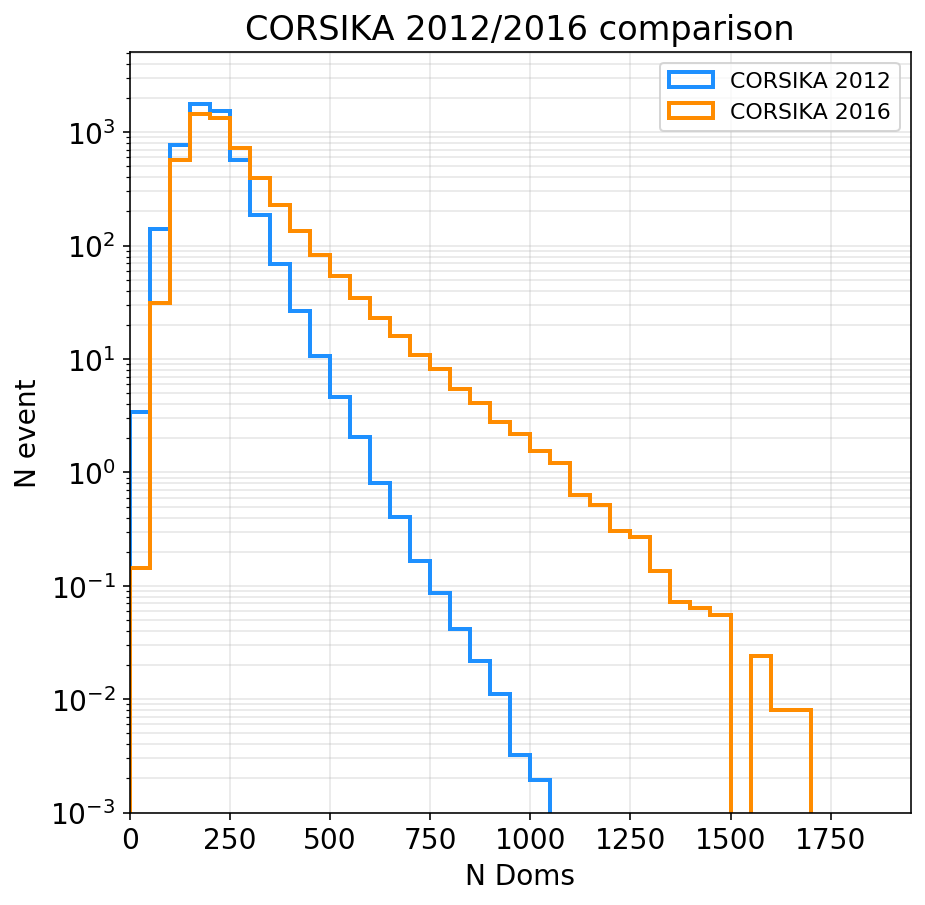

In [445]:
compare(N_dom_corsika_12,N_dom_corsika_16,'N Doms',np.arange(0,2000,50))

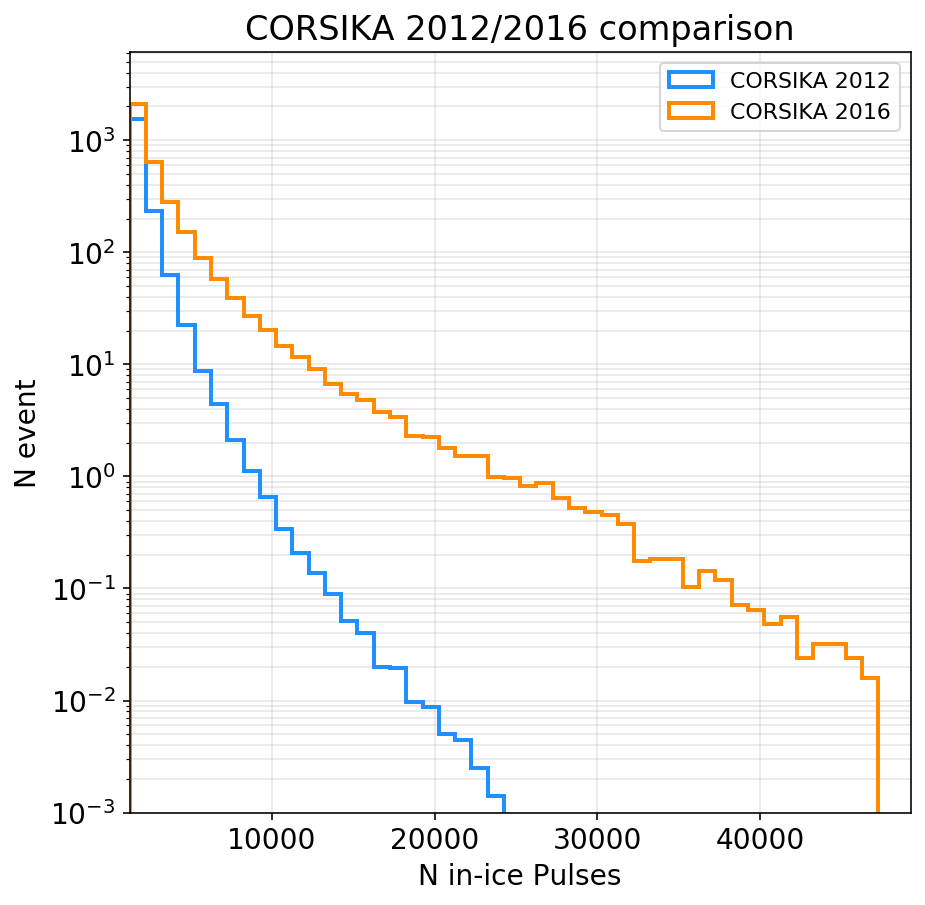

In [446]:
compare(N_pulses_corsika_12,N_pulses_corsika_16,'N in-ice Pulses',np.arange(1250,50000,1000))

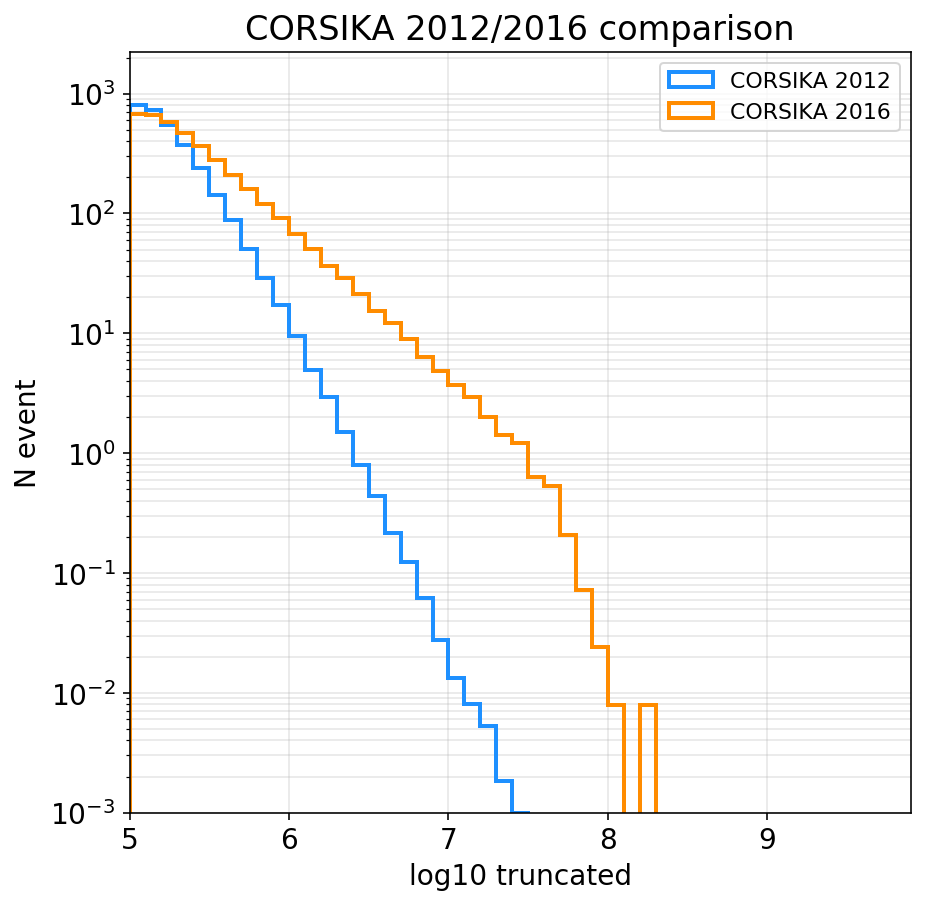

In [447]:
compare(np.log10(truncated_muon_e_corsika_12),np.log10(truncated_muon_e_corsika_16),'log10 truncated',np.arange(5,10,0.1))

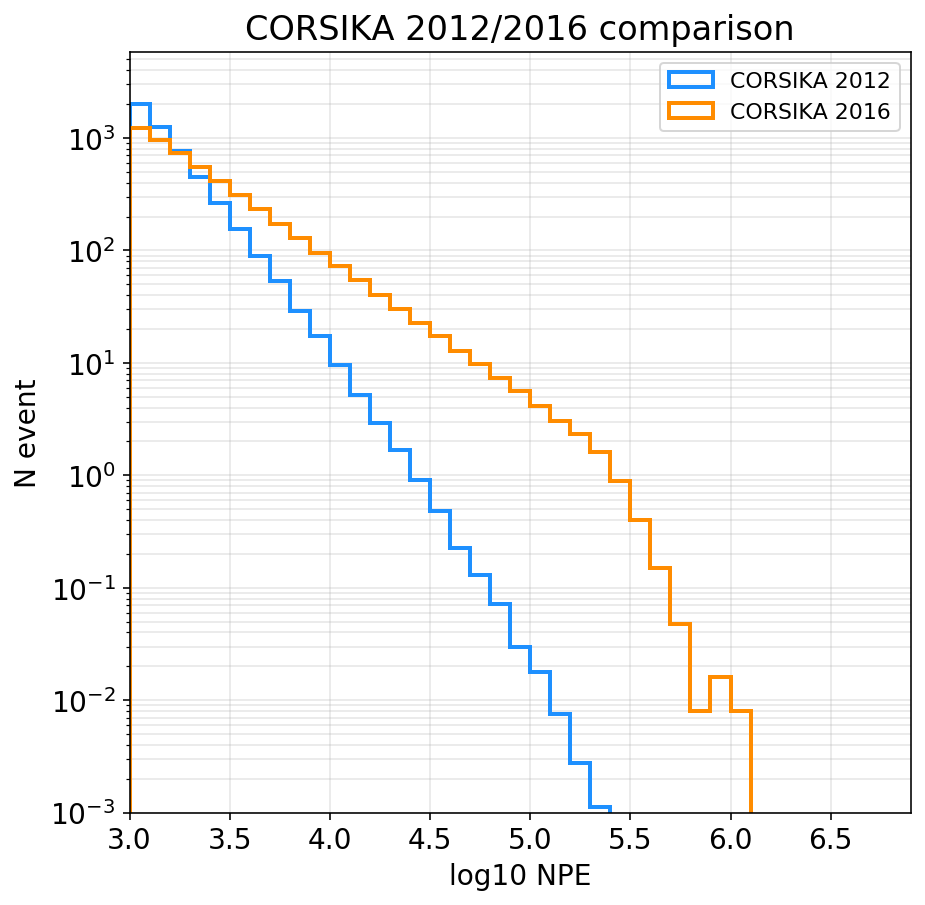

In [448]:
compare(np.log10(NPE_corsika_12),np.log10(NPE_corsika_16),'log10 NPE',np.arange(3,7,0.1))

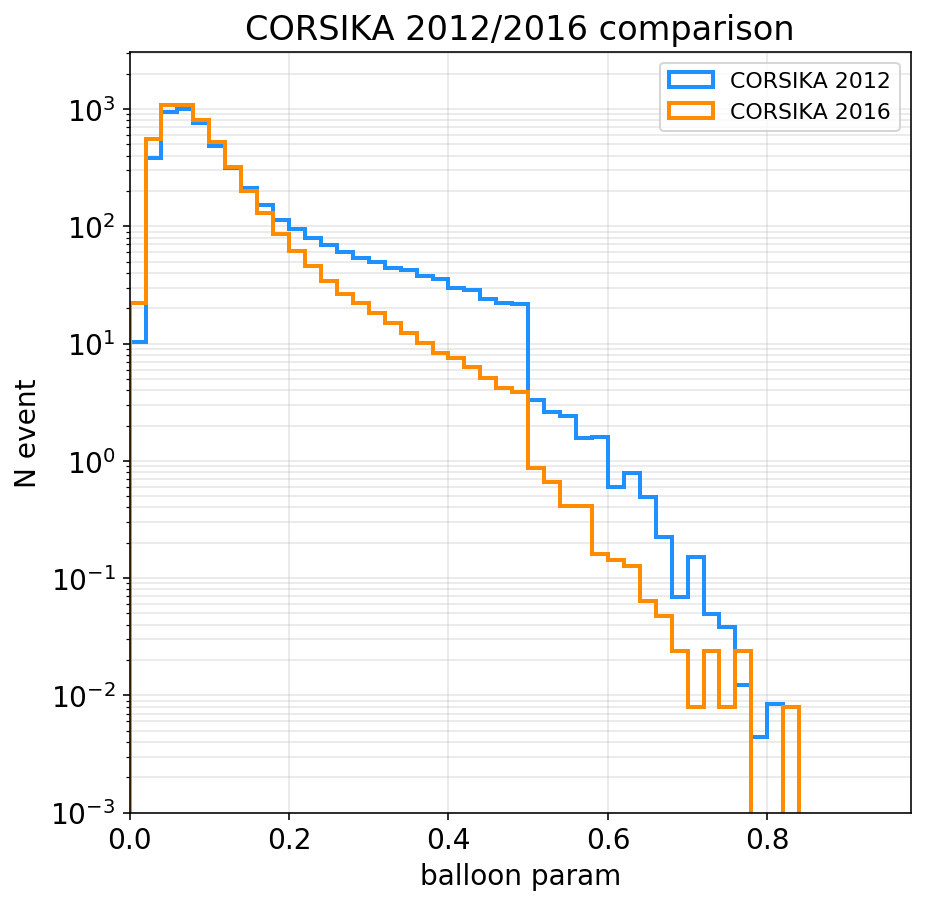

In [449]:
compare(balloon_corsika_12,balloon_corsika_16,'balloon param',np.arange(0,1,0.02))

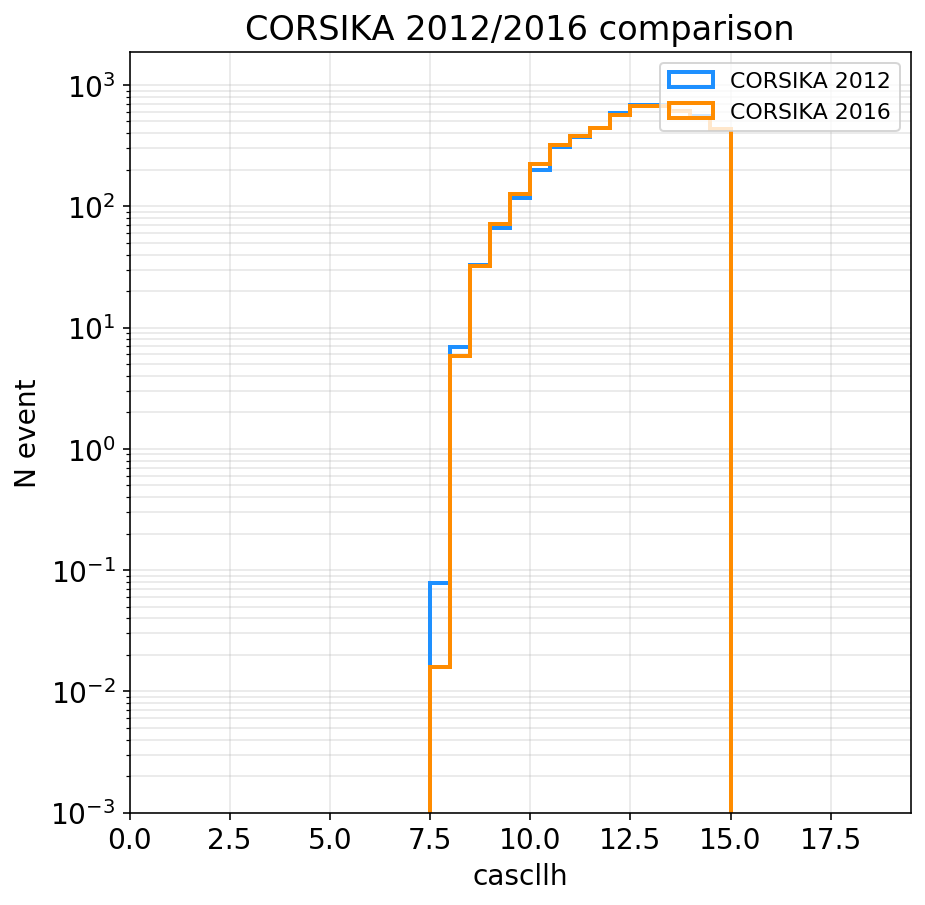

In [450]:
compare(cascllh_corsika_12,cascllh_corsika_16,'cascllh',np.arange(0,20,0.5))

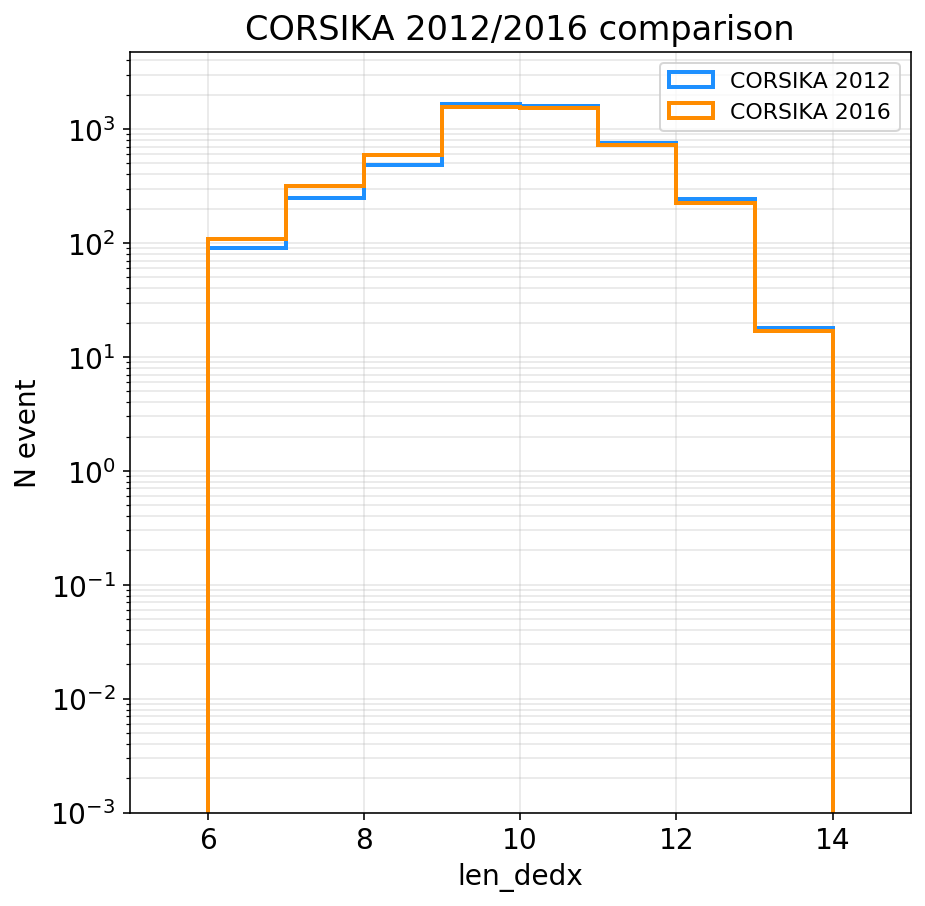

In [451]:
compare(len_dedx_corsika_12,len_dedx_corsika_16,'len_dedx',np.arange(5,16,1))

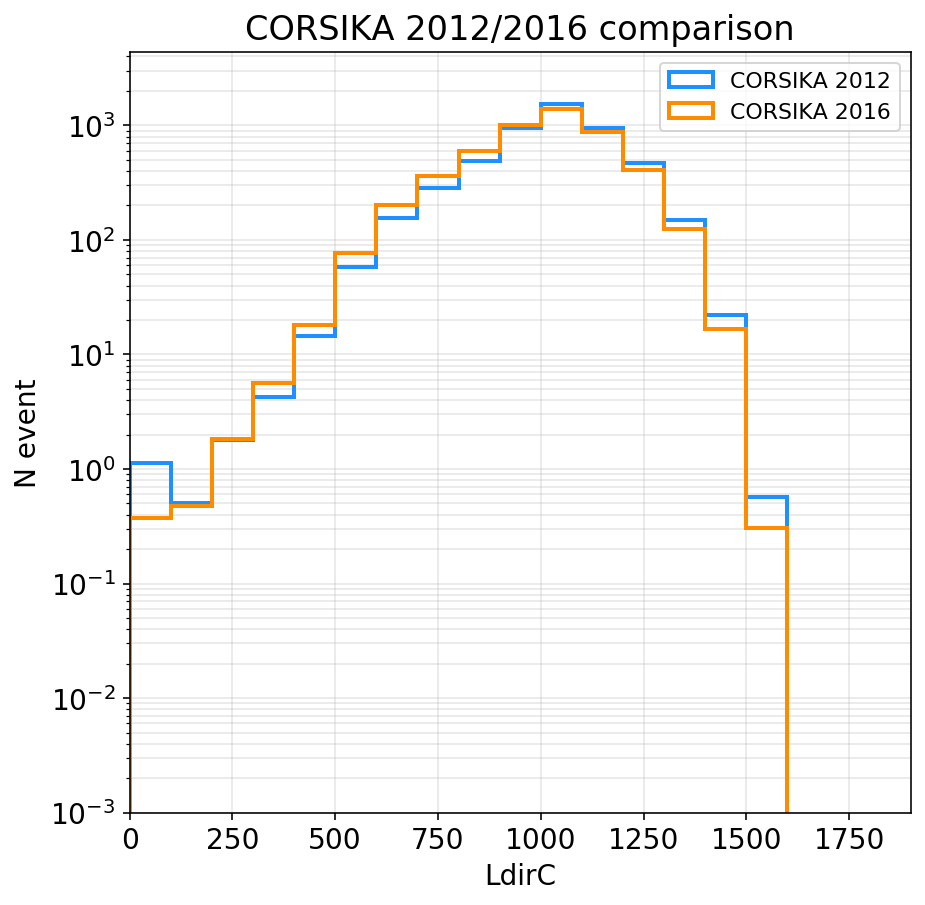

In [452]:
compare(Ldir_corsika_12,Ldir_corsika_16,'LdirC',np.arange(0,2000,100))

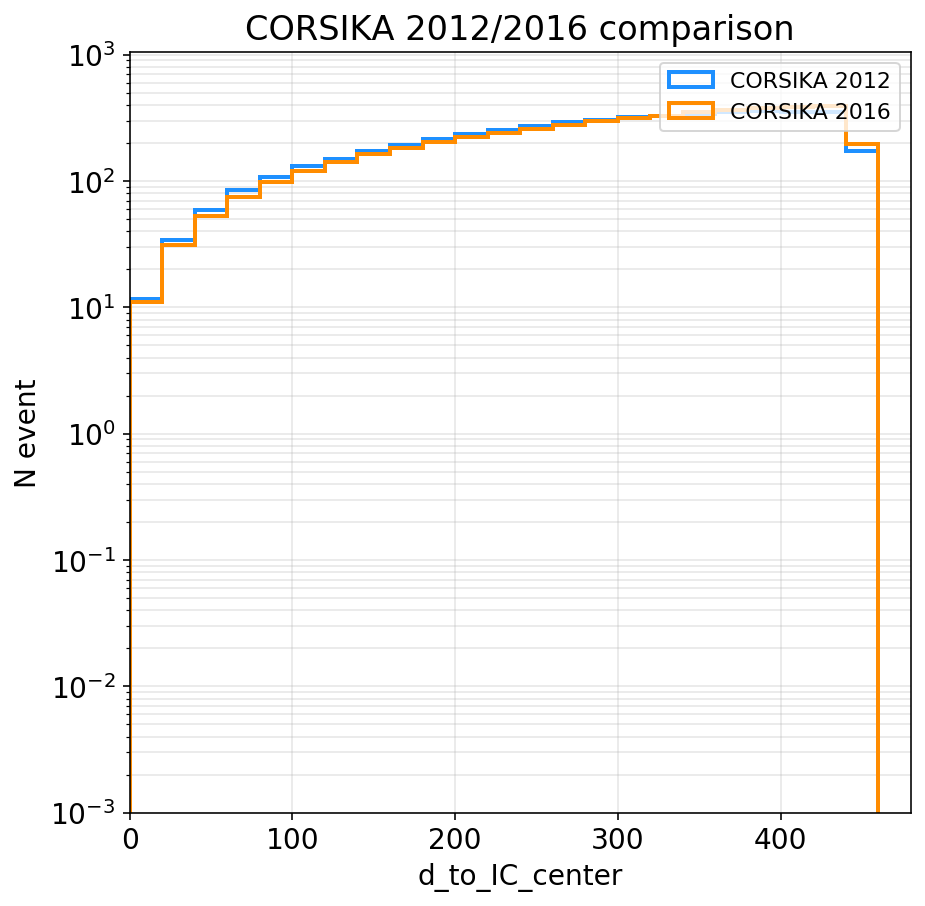

In [453]:
compare(d_to_IC_center_corsika_12,d_to_IC_center_corsika_16,'d_to_IC_center',np.arange(0,500,20))

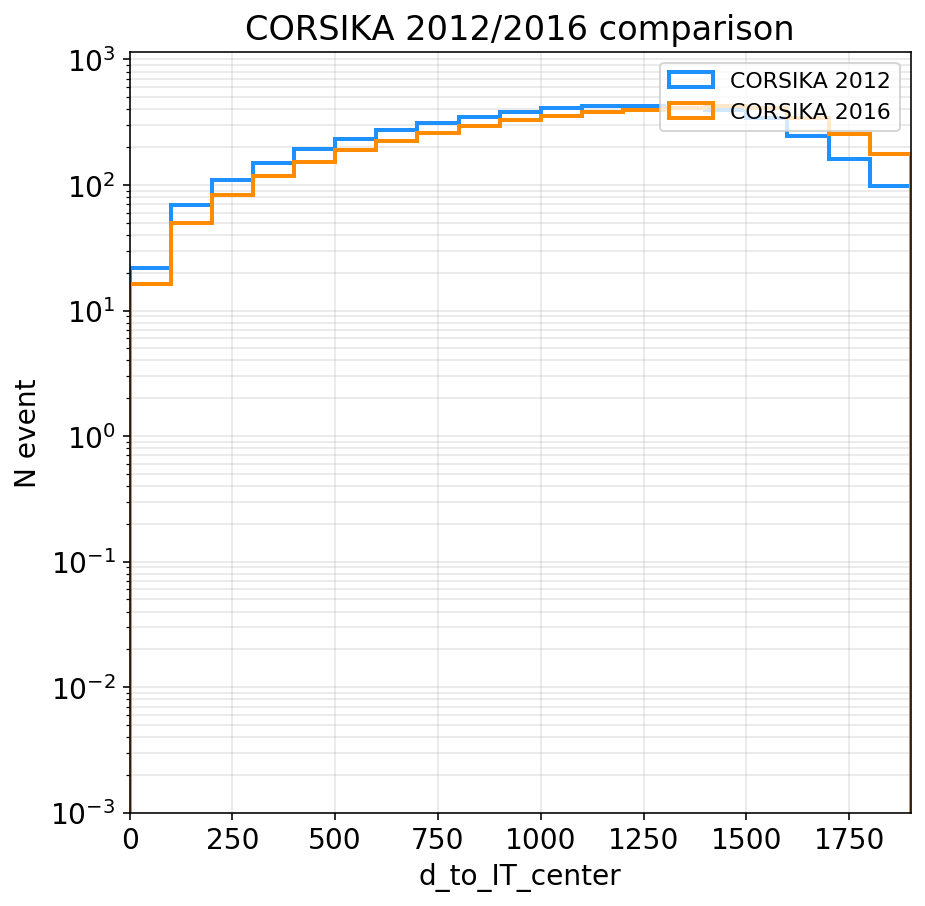

In [454]:
compare(d_to_IT_center_corsika_12,d_to_IT_center_corsika_16,'d_to_IT_center',np.arange(0,2000,100))

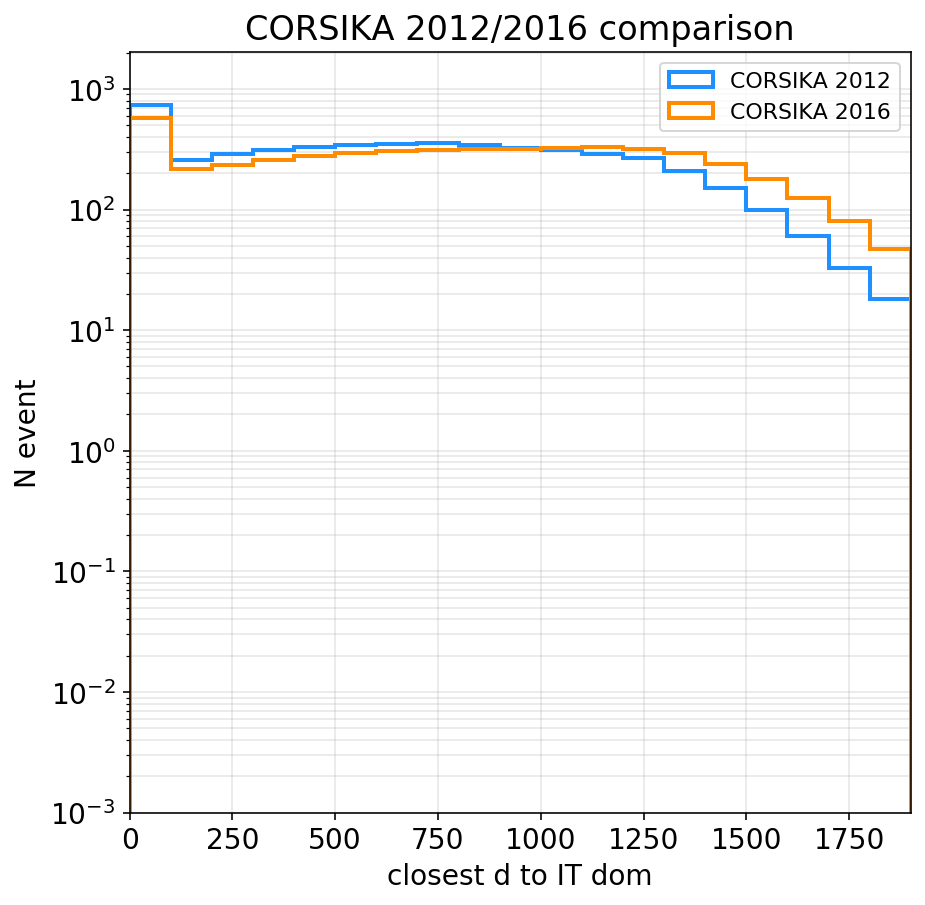

In [455]:
compare(closest_d_corsika_12,closest_d_corsika_16,'closest d to IT dom',np.arange(0,2000,100))

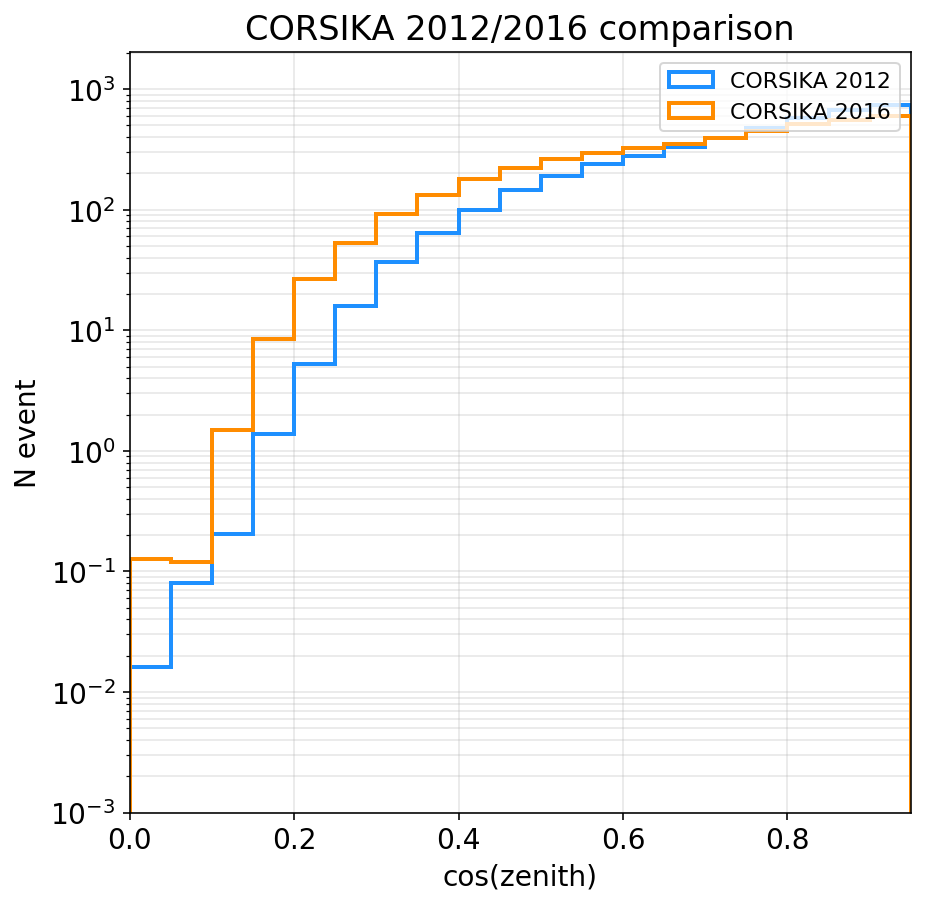

In [456]:
compare(np.cos(zenith_corsika_12),np.cos(zenith_corsika_16),'cos(zenith)',np.arange(0,1,0.05))